# Enhancing PV Grid Management Through AC-Power Prediction

- Solar energy generation is rapidly emerging as one of the most promising and fastest-growing renewable sources of power worldwide. With the increasing demand for electrical energy in our daily lives, photovoltaic (PV) cells have become a key player in meeting these needs. PV cells, semiconductor devices, directly convert sunlight energy into electricity through the photovoltaic effect.

- A single solar cell, measuring 4 cm2, produces a voltage of 0.5 to 1 V and can generate 0.7W of power when exposed to sunlight. The most efficiently designed solar panels typically achieve a maximum efficiency of 25%. To enhance voltage and power generation, individual cells are interconnected, with some connected in series and others in parallel.

<p align="center">
  <img src="Standalone-Solar-Electric-Systems.jpg" alt="Solar Energy Generating System (SEGS)" width="600">
</p>

- PV modules are created by connecting numerous solar cells, and these modules are further linked to form a PV array suitable for applications ranging from small-scale to high-power generation. In a Solar Energy Generating System (SEGS) displayed above, solar panels convert solar energy into Direct Current (DC). This DC is then routed through an inverter to transform it into Alternating Current (AC), making it more compatible with transmission through centralized power grids.

**Dataset Description**

This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.

### Import Libraries and Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.float_format', '{:.15f}'.format)

# Requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.0
seaborn version :  0.13.2


#### Load Dataset (Jupyter Notebook)

In [2]:
#Load power generation dataset
plant1_generation = pd.read_csv('Plant_1_Generation_Data.csv')
plant2_generation = pd.read_csv('Plant_2_Generation_Data.csv')

#Load sensor dataset
plant1_sensor = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
plant2_sensor = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

#### Load Dataset (Google Colab)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# #Load power generation dataset
# plant_1_generation = pd.read_csv('Plant_1_Generation_Data.csv')
# plant_2_generation = pd.read_csv('Plant_2_Generation_Data.csv')

# #Load sensor dataset
# plant_1_sensor = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
# plant_2_sensor = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

# Initial Data Understanding and Pre-Processing

In [5]:
plant1_generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [6]:
plant2_generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [7]:
plant1_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [8]:
plant2_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


## Files and Features Description

**A. Generation data : Solar power generation data for one plant gathered at 15 minutes intervals over a 34 days period.**

- **DATE_TIME**
  - Definition: Date and time for each observation. Observations recorded at 15 minute intervals.

- **PLANT_ID**
  - Definition: Number ID of the plant (this will be common for the entire file)

- **SOURCE_KEY**
  - Definition: Number ID of the inverter

- **DC_POWER**
  - Definition: Amount of DC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.

- **AC_POWER**
  - Definition: Amount of AC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.

- **DAILY_YIELD**
  - Definition: Daily yield is a cumulative sum of power generated on that day, till that point in time.

- **TOTAL_YIELD**
  - Definition: This is the total yield for the inverter till that point in time.

**B. Weather Sensor Data : Weather sensor data gathered for one solar plant every 15 minutes over a 34 days period.**

- **DATE_TIME**
  - Definition: Date and time for each observation. Observations recorded at 15 minute intervals.

- **PLANT_ID**
  - Definition: Number ID of the plant (this will be common for the entire file)

- **SOURCE_KEY**
  - Definition: Stands for the sensor panel id. This will be common for the entire file because there's only one sensor panel for the plant.

- **AMBIENT_TEMPERATURE**
  - Definition: This is the ambient temperature at the plant.

- **MODULE_TEMPERATURE**
  - Definition: There's a module (solar panel) attached to the sensor panel. This is the temperature reading for that module.

- **IRRADIATION**
  - Definition: Amount of irradiation for the 15 minute interval.

! Important notes regarding irradiance understanding : 

- Solar irradiance is the power per unit area (surface power density) received from the Sun in the form of electromagnetic radiation in the wavelength range of the measuring instrument. Solar irradiance is measured in watts per square metre (W/m2) in SI units.

- Solar irradiance is often integrated over a given time period in order to report the radiant energy emitted into the surrounding environment (joule per square metre, J/m2) during that time period. This integrated solar irradiance is called solar irradiation, solar exposure, solar insolation, or insolation.

- Irradiance may be measured in space or at the Earth's surface after atmospheric absorption and scattering. Irradiance in space is a function of distance from the Sun, the solar cycle, and cross-cycle changes. Irradiance on the Earth's surface additionally depends on the tilt of the measuring surface, the height of the Sun above the horizon, and atmospheric conditions.

- Since the strength of solar radiation reaching Earth is not evenly distributed across the electromagnetic spectrum, in addition to the total solar irradiance (TSI), measurement of the spectral solar irradiance (SSI) is also essential, especially as it interacts with different materials and processes on the Earth’s surface and atmosphere in different ways. SSI will allow scientists to adequately understand and resolve the relationships between the different wavelengths of sunlight and the properties of the materials they interact with, and can serve as the basis for the retrieval of geophysical quantities of various materials and phenomena by remote sensing, as well as the calibration of many of the instruments used for such measurements. SSI measured at the top of the atmosphere (TOA) and integrated across 200–2400 nm represents 97% of the TSI.

<p align="center">
  <img src="TSIS diagram_annotated.jpg" alt="Simulated spectral solar irradiance" width="600">
</p>

- Picture above is the Simulated spectral solar irradiance at the top of the atmosphere (ToA) and the Earth's surface. The different regions of the spectrum include: ultraviolet (UV), visible, near infrared (NIR), and shortwave infrared (SWIR). The range typically covered by SSI is indicated by the broken line at the top. The regions of spectrum where irradiance is absorbed by various atmospheric constituents are indicated, including: ozone (O3), oxygen (O2), water vapor (H2O), carbon dioxide (CO2), and methane (CH4). Graphics by Luke Ellison.

In [9]:
plant1_generation.head(25)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0   15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1   15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2   15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3   15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4   15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
5   15-05-2020 00:00   4135001  VHMLBKoKgIrUVDU       0.0       0.0   
6   15-05-2020 00:00   4135001  WRmjgnKYAwPKWDb       0.0       0.0   
7   15-05-2020 00:00   4135001  ZnxXDlPa8U1GXgE       0.0       0.0   
8   15-05-2020 00:00   4135001  ZoEaEvLYb1n2sOq       0.0       0.0   
9   15-05-2020 00:00   4135001  adLQvlD726eNBSB       0.0       0.0   
10  15-05-2020 00:00   4135001  bvBOhCH3iADSZry       0.0       0.0   
11  15-05-2020 00:00   4135001  iCRJl6heRkivqQ3       0.0       0.0   
12  15-05-2020 00:00   4135001  ih0vzX44oOqAx2f       0.0       0.0   
13  15-05-2020 00:00   4135001  pkci93gMrogZuBj       0.0       0.0   
14  15-05-2020 00:00   4135001  rGa61gmuvPhdLxV       0.0       0.0   
15  15-05-2020 00:00   4135001  sjndEbLyjtCKgGv       0.0       0.0   
16  15-05-2020 00:00   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
17  15-05-2020 00:00   4135001  wCURE6d3bPkepu2       0.0       0.0   
18  15-05-2020 00:00   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
19  15-05-2020 00:00   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
20  15-05-2020 00:00   4135001  zVJPv84UY57bAof       0.0       0.0   
21  15-05-2020 00:15   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
22  15-05-2020 00:15   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
23  15-05-2020 00:15   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
24  15-05-2020 00:15   4135001  7JYdWkrLSPkdwr4       0.0       0.0   

    DAILY_YIELD  TOTAL_YIELD  
0           0.0    6259559.0  
1           0.0    6183645.0  
2           0.0    6987759.0  
3           0.0    7602960.0  
4           0.0    7158964.0  
5           0.0    7206408.0  
6           0.0    7028673.0  
7           0.0    6522172.0  
8           0.0    7098099.0  
9           0.0    6271355.0  
10          0.0    6316803.0  
11          0.0    7177992.0  
12          0.0    6185184.0  
13          0.0    7169102.0  
14          0.0    7111493.0  
15          0.0    7016832.0  
16          0.0    7038681.0  
17          0.0    6782598.0  
18          0.0    7007866.0  
19          0.0    6339380.0  
20          0.0    7116151.0  
21          0.0    6259559.0  
22          0.0    6183645.0  
23          0.0    6987759.0  
24          0.0    7602960.0

In [10]:
plant2_generation.head(25)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0   2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1   2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2   2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3   2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4   2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   
5   2020-05-15 00:00:00   4136001  LYwnQax7tkwH5Cb       0.0       0.0   
6   2020-05-15 00:00:00   4136001  LlT2YUhhzqhg5Sw       0.0       0.0   
7   2020-05-15 00:00:00   4136001  Mx2yZCDsyf6DPfv       0.0       0.0   
8   2020-05-15 00:00:00   4136001  NgDl19wMapZy17u       0.0       0.0   
9   2020-05-15 00:00:00   4136001  PeE6FRyGXUgsRhN       0.0       0.0   
10  2020-05-15 00:00:00   4136001  Qf4GUc1pJu5T6c6       0.0       0.0   
11  2020-05-15 00:00:00   4136001  Quc1TzYxW2pYoWX       0.0       0.0   
12  2020-05-15 00:00:00   4136001  V94E5Ben1TlhnDV       0.0       0.0   
13  2020-05-15 00:00:00   4136001  WcxssY2VbP4hApt       0.0       0.0   
14  2020-05-15 00:00:00   4136001  mqwcsP2rE7J0TFp       0.0       0.0   
15  2020-05-15 00:00:00   4136001  oZ35aAeoifZaQzV       0.0       0.0   
16  2020-05-15 00:00:00   4136001  oZZkBaNadn6DNKz       0.0       0.0   
17  2020-05-15 00:00:00   4136001  q49J1IKaHRwDQnt       0.0       0.0   
18  2020-05-15 00:00:00   4136001  rrq4fwE8jgrTyWY       0.0       0.0   
19  2020-05-15 00:00:00   4136001  vOuJvMaM2sgwLmb       0.0       0.0   
20  2020-05-15 00:00:00   4136001  xMbIugepa2P7lBB       0.0       0.0   
21  2020-05-15 00:00:00   4136001  xoJJ8DcxJEcupym       0.0       0.0   
22  2020-05-15 00:15:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
23  2020-05-15 00:15:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
24  2020-05-15 00:15:00   4136001  9kRcWv60rDACzjR       0.0       0.0   

    DAILY_YIELD   TOTAL_YIELD  
0   9425.000000  2.429011e+06  
1      0.000000  1.215279e+09  
2   3075.333333  2.247720e+09  
3    269.933333  1.704250e+06  
4   3177.000000  1.994153e+07  
5   1872.500000  1.794959e+09  
6   1094.357143  2.825928e+08  
7   5692.200000  2.453646e+06  
8   1866.200000  1.115126e+08  
9    651.200000  1.348351e+09  
10     0.000000  8.384214e+08  
11  5495.000000  3.295091e+08  
12     0.000000  1.412083e+09  
13     0.000000  1.816953e+08  
14  1238.533333  5.935800e+08  
15  1281.466667  1.659965e+09  
16     0.000000  1.708083e+09  
17  4315.000000  3.399230e+05  
18   280.214286  1.209641e+08  
19     0.000000  2.211962e+06  
20  9166.000000  1.066566e+08  
21     0.000000  2.091436e+08  
22  9425.000000  2.429011e+06  
23     0.000000  1.215279e+09  
24     0.000000  2.247720e+09

In [11]:
plant1_sensor.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0

In [12]:
plant2_sensor.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1  2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2  2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3  2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4  2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148   

   MODULE_TEMPERATURE  IRRADIATION  
0           25.060789          0.0  
1           24.421869          0.0  
2           24.427290          0.0  
3           24.420678          0.0  
4           25.088210          0.0

Just from these information, there are some useful insight to this data that understanding it could make it easier for further analysis and feature transformation, they are :

- Date feature have the wrong format should be in datetime instead of object.
- In generation data, the recorded data is not aggregated on 15 minute interval but still on individual data recording, will have to change that later. This is not the case for sensor data.
- Although group by not actually needed for sensor data, it's good to also do group by on sensor data to remove PLANT_ID and SOURCE_KEY (we could also do this just by casually dropping the columns) since we wont be needing those for analysis especially later on making model

In [13]:
#Aggregate plant 1 generation data by datetime
plant1_generation_agg = plant1_generation.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum').reset_index()
plant1_generation_agg

DATE_TIME  DC_POWER  AC_POWER    DAILY_YIELD  TOTAL_YIELD
0     01-06-2020 00:00       0.0       0.0    5407.250000  153519480.0
1     01-06-2020 00:15       0.0       0.0       0.000000  153519480.0
2     01-06-2020 00:30       0.0       0.0       0.000000  153519480.0
3     01-06-2020 00:45       0.0       0.0       0.000000  153519480.0
4     01-06-2020 01:00       0.0       0.0       0.000000  153519480.0
...                ...       ...       ...            ...          ...
3153  31-05-2020 22:45       0.0       0.0  125291.000000  153519480.0
3154  31-05-2020 23:00       0.0       0.0  125291.000000  153519480.0
3155  31-05-2020 23:15       0.0       0.0  125291.000000  153519480.0
3156  31-05-2020 23:30       0.0       0.0  125291.000000  153519480.0
3157  31-05-2020 23:45       0.0       0.0  113737.142857  153519480.0

[3158 rows x 5 columns]

In [14]:
#Aggregate plant 2 generation data by datetime
plant2_generation_agg = plant2_generation.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum').reset_index()
plant2_generation_agg

DATE_TIME  DC_POWER  AC_POWER   DAILY_YIELD   TOTAL_YIELD
0     2020-05-15 00:00:00       0.0       0.0  48899.938095  1.418960e+10
1     2020-05-15 00:15:00       0.0       0.0  28401.000000  1.418960e+10
2     2020-05-15 00:30:00       0.0       0.0  28401.000000  1.418960e+10
3     2020-05-15 00:45:00       0.0       0.0  28401.000000  1.418960e+10
4     2020-05-15 01:00:00       0.0       0.0  26516.000000  1.418960e+10
...                   ...       ...       ...           ...           ...
3254  2020-06-17 22:45:00       0.0       0.0  93040.000000  1.419408e+10
3255  2020-06-17 23:00:00       0.0       0.0  93040.000000  1.419408e+10
3256  2020-06-17 23:15:00       0.0       0.0  93040.000000  1.419408e+10
3257  2020-06-17 23:30:00       0.0       0.0  93040.000000  1.419408e+10
3258  2020-06-17 23:45:00       0.0       0.0  93040.000000  1.419408e+10

[3259 rows x 5 columns]

In [15]:
#Aggregate plant 1 sensor data by datetime
plant1_sensor_agg = plant1_sensor.groupby('DATE_TIME')[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE', 'IRRADIATION']].agg('sum').reset_index()
plant1_sensor_agg

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0     2020-05-15 00:00:00            25.184316           22.857507   
1     2020-05-15 00:15:00            25.084589           22.761668   
2     2020-05-15 00:30:00            24.935753           22.592306   
3     2020-05-15 00:45:00            24.846130           22.360852   
4     2020-05-15 01:00:00            24.621525           22.165423   
...                   ...                  ...                 ...   
3177  2020-06-17 22:45:00            22.150570           21.480377   
3178  2020-06-17 23:00:00            22.129816           21.389024   
3179  2020-06-17 23:15:00            22.008275           20.709211   
3180  2020-06-17 23:30:00            21.969495           20.734963   
3181  2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
3177          0.0  
3178          0.0  
3179          0.0  
3180          0.0  
3181          0.0  

[3182 rows x 4 columns]

In [16]:
#Aggregate plant 2 sensor data by datetime
plant2_sensor_agg = plant2_sensor.groupby('DATE_TIME')[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE', 'IRRADIATION']].agg('sum').reset_index()
plant2_sensor_agg

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0     2020-05-15 00:00:00            27.004764           25.060789   
1     2020-05-15 00:15:00            26.880811           24.421869   
2     2020-05-15 00:30:00            26.682055           24.427290   
3     2020-05-15 00:45:00            26.500589           24.420678   
4     2020-05-15 01:00:00            26.596148           25.088210   
...                   ...                  ...                 ...   
3254  2020-06-17 22:45:00            23.511703           22.856201   
3255  2020-06-17 23:00:00            23.482282           22.744190   
3256  2020-06-17 23:15:00            23.354743           22.492245   
3257  2020-06-17 23:30:00            23.291048           22.373909   
3258  2020-06-17 23:45:00            23.202871           22.535908   

      IRRADIATION  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
3254          0.0  
3255          0.0  
3256          0.0  
3257          0.0  
3258          0.0  

[3259 rows x 4 columns]

In [17]:
#Checking amount of missing values
datasets = [plant1_generation_agg, plant2_generation_agg, plant1_sensor, plant2_sensor]

for dataset in datasets :
    print(dataset.isnull().any())

DATE_TIME      False
DC_POWER       False
AC_POWER       False
DAILY_YIELD    False
TOTAL_YIELD    False
dtype: bool
DATE_TIME      False
DC_POWER       False
AC_POWER       False
DAILY_YIELD    False
TOTAL_YIELD    False
dtype: bool
DATE_TIME              False
PLANT_ID               False
SOURCE_KEY             False
AMBIENT_TEMPERATURE    False
MODULE_TEMPERATURE     False
IRRADIATION            False
dtype: bool
DATE_TIME              False
PLANT_ID               False
SOURCE_KEY             False
AMBIENT_TEMPERATURE    False
MODULE_TEMPERATURE     False
IRRADIATION            False
dtype: bool


In [18]:
#Checking amount of duplicated values
for dataset in datasets :
    print(dataset.duplicated().any())

False
False
False
False


There are no missing or duplicated values in the dataset

In [19]:
#Convert DATE_TIME feature into datetime format

#Plant 1 generation data
plant1_generation_agg['DATE_TIME'] = pd.to_datetime(plant1_generation_agg['DATE_TIME'], format="%d-%m-%Y %H:%M")
plant1_generation_agg['TIME'] = plant1_generation_agg['DATE_TIME'].dt.time
plant1_generation_agg['DATE'] = pd.to_datetime(plant1_generation_agg['DATE_TIME'].dt.date)

#Plant 2 generation data
plant2_generation_agg['DATE_TIME'] = pd.to_datetime(plant2_generation_agg['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
plant2_generation_agg['TIME'] = plant2_generation_agg['DATE_TIME'].dt.time
plant2_generation_agg['DATE'] = pd.to_datetime(plant2_generation_agg['DATE_TIME'].dt.date)

#Plant 1 sensor data
plant1_sensor_agg['DATE_TIME'] = pd.to_datetime(plant1_sensor_agg['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
plant1_sensor_agg['TIME'] = plant1_sensor_agg['DATE_TIME'].dt.time 
plant1_sensor_agg['DATE'] = pd.to_datetime(plant1_sensor_agg['DATE_TIME'].dt.date)

#Plant 2 sensor data
plant2_sensor_agg['DATE_TIME'] = pd.to_datetime(plant2_sensor_agg['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
plant2_sensor_agg['TIME'] = plant2_sensor_agg['DATE_TIME'].dt.time 
plant2_sensor_agg['DATE'] = pd.to_datetime(plant2_sensor_agg['DATE_TIME'].dt.date)

In [20]:
# # Initial data transformation :  converting column name to lowercase
# for dataset in datasets :
#     dataset.columns = dataset.columns.str.lower()

# Further EDA on Generation Data (Univariate and Bivariate)

In [21]:
#Describe columns on plant 1
plant1_generation_agg.describe().transpose()

count                           mean                  min  \
DATE_TIME      3158  2020-06-01 06:42:44.344521728  2020-05-15 00:00:00   
DC_POWER     3158.0                   68547.713729                  0.0   
AC_POWER     3158.0                    6703.628149                  0.0   
DAILY_YIELD  3158.0                   71782.817545                  0.0   
TOTAL_YIELD  3158.0               151989182.227813           26540040.0   
DATE           3158  2020-05-31 18:42:38.074730752  2020-05-15 00:00:00   

                             25%                  50%                  75%  \
DATE_TIME    2020-05-23 23:18:45  2020-06-01 12:37:30  2020-06-09 17:56:15   
DC_POWER                     0.0          8515.285714        140386.504463   
AC_POWER                     0.0           823.033036         13750.606696   
DAILY_YIELD                90.75              66068.0             129398.5   
TOTAL_YIELD      152097608.23175        153531986.983        154994999.624   
DATE         2020-05-23 00:00:00  2020-06-01 00:00:00  2020-06-09 00:00:00   

                             max              std  
DATE_TIME    2020-06-17 23:45:00              NaN  
DC_POWER            298937.78571     88044.612181  
AC_POWER            29150.212499      8603.120476  
DAILY_YIELD             193770.0     65974.417997  
TOTAL_YIELD          156142755.0  10616697.925153  
DATE         2020-06-17 00:00:00              NaN

In [22]:
#Describe columns on plant 2
plant2_generation_agg.describe().transpose()

count                           mean                  min  \
DATE_TIME      3259  2020-06-01 00:04:35.053697536  2020-05-15 00:00:00   
DC_POWER     3259.0                    5124.648465                  0.0   
AC_POWER     3259.0                    5011.974903                  0.0   
DAILY_YIELD  3259.0                   68443.535809                  0.0   
TOTAL_YIELD  3259.0             13688016043.790148                  0.0   
DATE           3259  2020-05-31 12:12:35.569193216  2020-05-15 00:00:00   

                             25%                  50%                  75%  \
DATE_TIME    2020-05-23 12:07:30  2020-06-01 00:00:00  2020-06-09 12:07:30   
DC_POWER                     0.0           494.427143         11048.773333   
AC_POWER                     0.0           477.536667         10795.727619   
DAILY_YIELD         18698.245238              73875.0         110975.22381   
TOTAL_YIELD   13359126745.700001   14190162599.714289   14193115082.866667   
DATE         2020-05-23 00:00:00  2020-06-01 00:00:00  2020-06-09 00:00:00   

                             max                std  
DATE_TIME    2020-06-17 23:45:00                NaN  
DC_POWER            26630.506667        6462.118509  
AC_POWER            25979.760476        6317.872611  
DAILY_YIELD             162876.0       48505.077129  
TOTAL_YIELD        14194078746.0  1245967821.466597  
DATE         2020-06-17 00:00:00                NaN

Number of inverter in Plant 1 : 22
Number of inverter in Plant 2 : 22


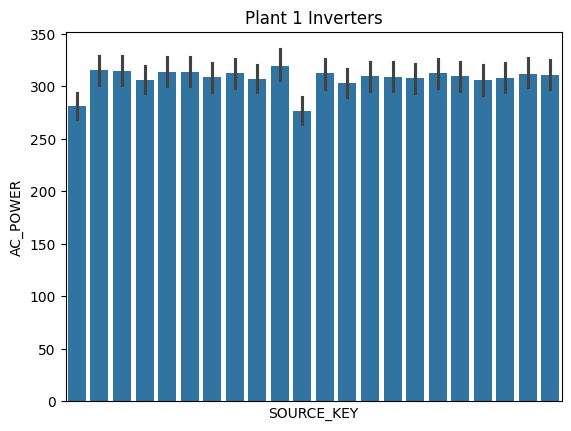

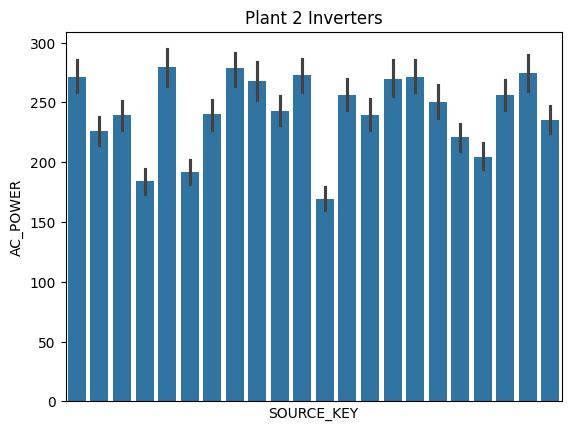

In [23]:
#Check for faulty in inverters/modules

print(f'Number of inverter in Plant 1 : {plant1_generation['SOURCE_KEY'].nunique()}')
print(f'Number of inverter in Plant 2 : {plant2_generation['SOURCE_KEY'].nunique()}')

sns.barplot(x='SOURCE_KEY', y='AC_POWER', data=plant1_generation)
plt.title('Plant 1 Inverters')
plt.xticks([])
plt.show()

sns.barplot(x='SOURCE_KEY', y='AC_POWER', data=plant2_generation)
plt.title('Plant 2 Inverters')
plt.xticks([])
plt.show()

The inverters in Plant 1 exhibit consistent outputs, whereas those in Plant 2 show fluctuations. This variance in Plant 2's output could potentially be attributed to malfunctioning inverters, assuming the solar modules are in good working condition.

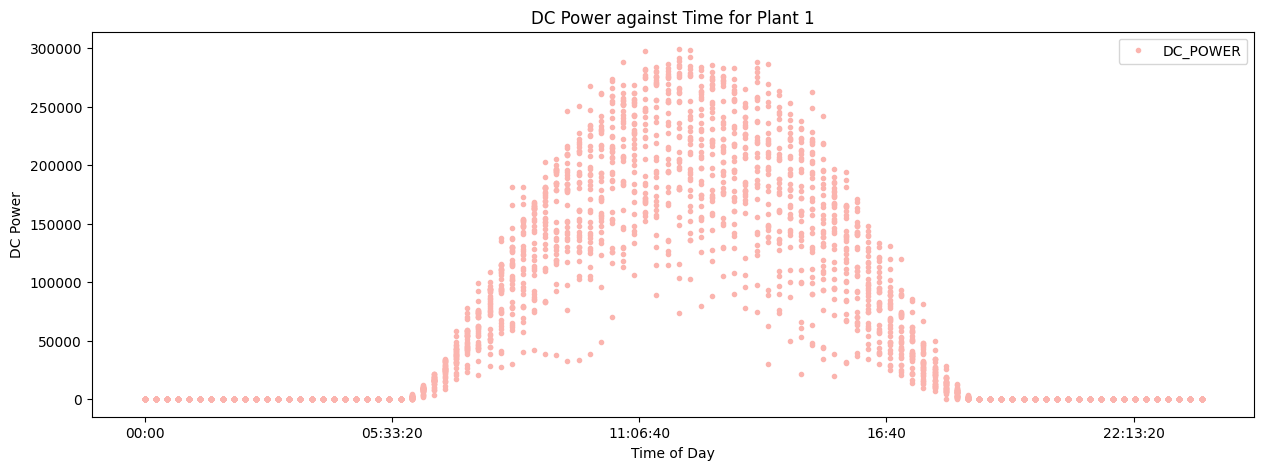

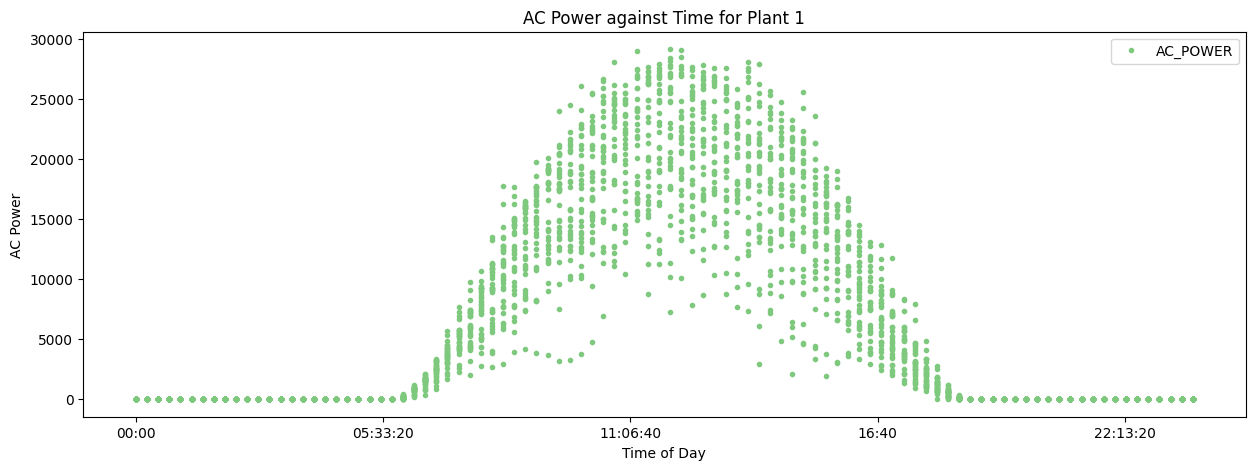

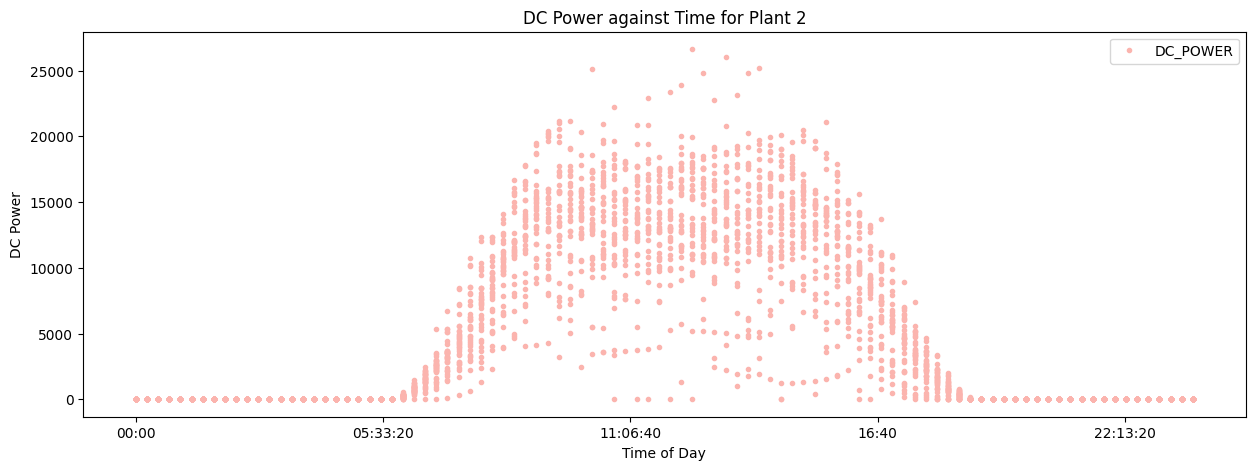

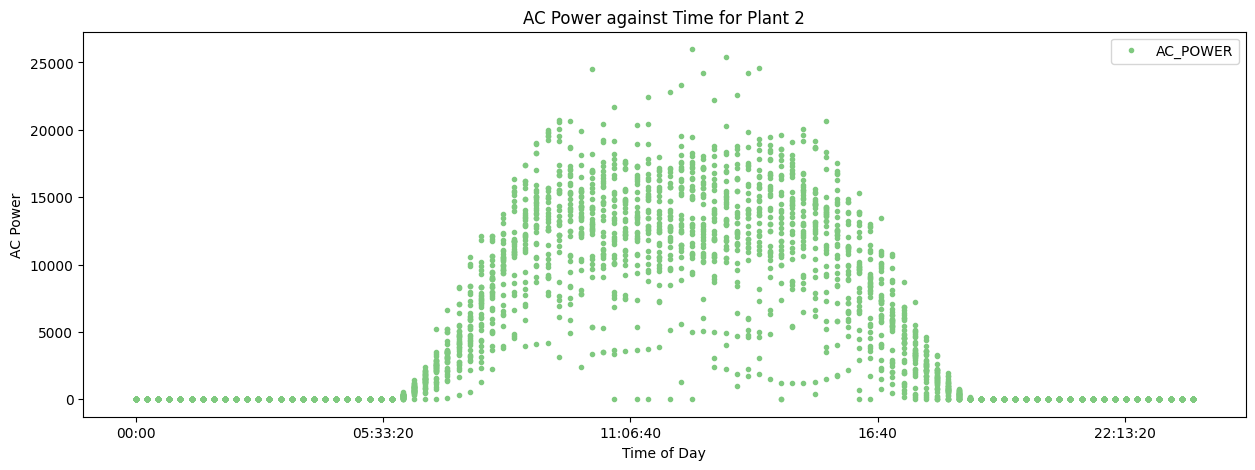

In [24]:
#Check power generation againts time in a day

plant1_generation_agg.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 5), colormap='Pastel1')
plt.ylabel('DC Power')
plt.xlabel('Time of Day')
plt.title('DC Power against Time for Plant 1')
plt.show()

plant1_generation_agg.plot(x= 'TIME', y='AC_POWER', style='.', figsize = (15, 5), colormap='Accent') 
plt.ylabel('AC Power')
plt.xlabel('Time of Day')
plt.title('AC Power against Time for Plant 1')
plt.show()

plant2_generation_agg.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 5), colormap='Pastel1')
plt.ylabel('DC Power')
plt.xlabel('Time of Day')
plt.title('DC Power against Time for Plant 2')
plt.show()

plant2_generation_agg.plot(x= 'TIME', y='AC_POWER', style='.', figsize = (15, 5), colormap='Accent') 
plt.ylabel('AC Power')
plt.xlabel('Time of Day')
plt.title('AC Power against Time for Plant 2')
plt.show()

- The generation of power relies on sunlight, commencing around 5:40 in the morning and concluding approximately at 6:00 in the evening. The availability of sunlight is determined by its intensity and wavelength upon reaching the PV cells. Despite sunlight still being present at 6:00 PM, it consists of diffused and scattered sunlight lacking the requisite wavelength for power generation.

- Plant 2 demonstrates increased variations in AC and DC power values, indicating that the issue may not lie with faulty inverters but rather with the modules themselves.

- We can also see that overall, the power generated from Plant 1 have higher values compared to Plant 2, we will check that down below

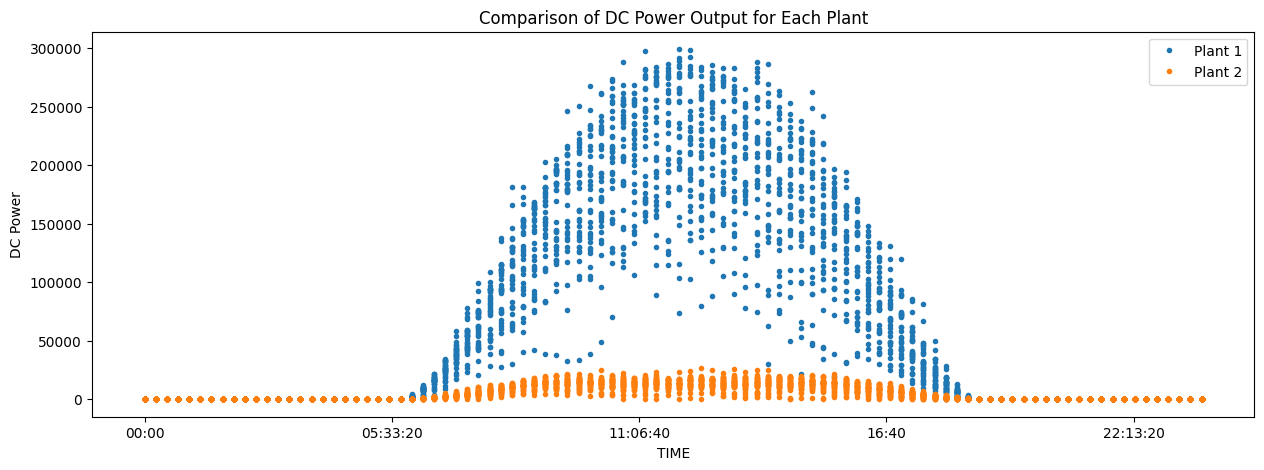

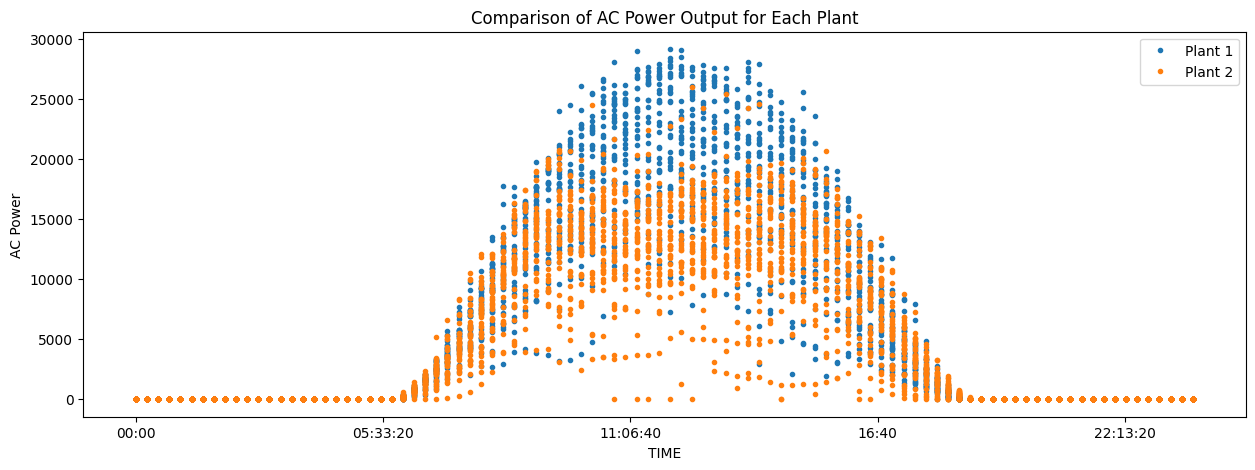

In [25]:
# DC output from solar module
fig, ax = plt.subplots(figsize=(15, 5))
plant1_generation_agg.plot(x='TIME', y='DC_POWER', style='.', label='Plant 1', ax=ax)
plant2_generation_agg.plot(x='TIME', y='DC_POWER', style='.', label='Plant 2', ax=ax)
plt.title('Comparison of DC Power Output for Each Plant')
plt.ylabel('DC Power')
plt.show()

# AC output from inverter
fig, ax = plt.subplots(figsize=(15, 5))
plant1_generation_agg.plot(x='TIME', y='AC_POWER', figsize=(15,5), legend=True, style='.', label='Plant 1', ax=ax)
plant2_generation_agg.plot(x='TIME', y='AC_POWER', legend=True, style='.', label='Plant 2', ax=ax)
plt.title('Comparison of AC Power Output for Each Plant')
plt.ylabel('AC Power')
plt.show()

- Plant 2 exhibits lower **DC power** output from its solar modules compared to Plant 1, nearly ten times less.
- Despite the more erratic nature of the **AC power** output from Plant 2, the levels of AC power output from both plants are similar.

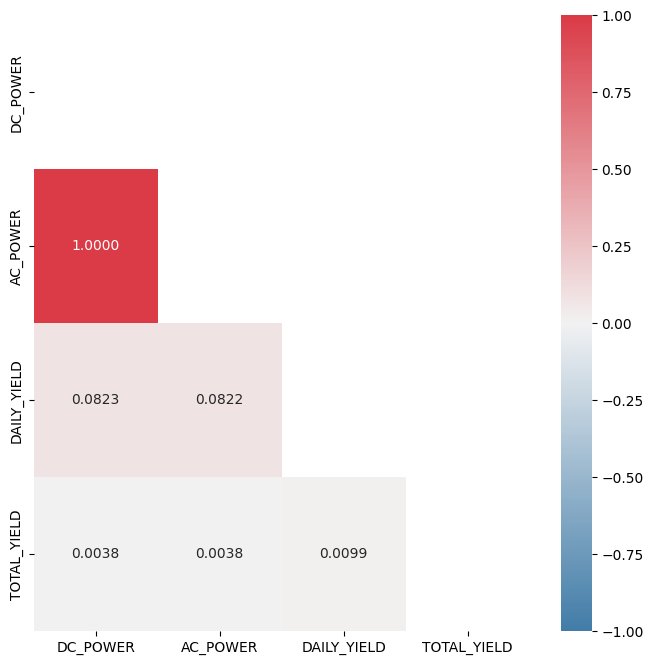

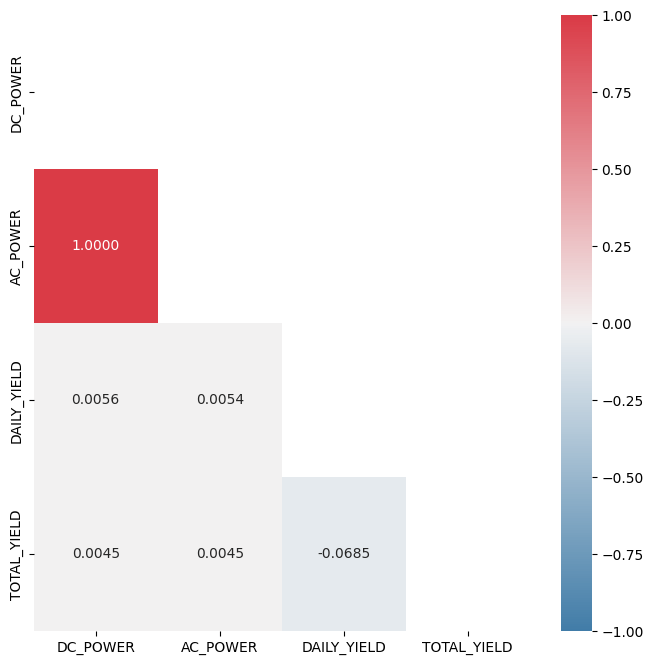

In [26]:
# Heatmap (corr pearson)

# Make new dataframe without ID column for each plant
gen1_corr = plant1_generation.drop('PLANT_ID', axis=1).corr(numeric_only=True, method='pearson')
gen2_corr = plant2_generation.drop('PLANT_ID', axis=1).corr(numeric_only=True, method='pearson')

# Plot correlation heatmap
gen1_mask = np.triu(np.ones_like(gen1_corr, dtype=bool))
gen2_mask = np.triu(np.ones_like(gen2_corr, dtype=bool))

plt.figure(figsize=(8,8))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = gen1_corr, cmap=cmap_custom, mask=gen1_mask, annot=True, fmt='.4f', vmin=-1, vmax=1)
plt.show()

plt.figure(figsize=(8,8))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = gen2_corr, cmap=cmap_custom, mask=gen2_mask, annot=True, fmt='.4f', vmin=-1, vmax=1)
plt.show()

* Correlation coefficient between DAILY_YIELD and output (AC_POWER and DC_POWER) for Plant 1 is higher than Plant 2.

# Further EDA on Sensor Data (Univariate and Bivariate)

In [27]:
plant1_sensor_agg

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    2020-05-15 00:00:00            25.184316           22.857507   
1    2020-05-15 00:15:00            25.084589           22.761668   
2    2020-05-15 00:30:00            24.935753           22.592306   
3    2020-05-15 00:45:00            24.846130           22.360852   
4    2020-05-15 01:00:00            24.621525           22.165423   
...                  ...                  ...                 ...   
3177 2020-06-17 22:45:00            22.150570           21.480377   
3178 2020-06-17 23:00:00            22.129816           21.389024   
3179 2020-06-17 23:15:00            22.008275           20.709211   
3180 2020-06-17 23:30:00            21.969495           20.734963   
3181 2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION      TIME       DATE  
0             0.0  00:00:00 2020-05-15  
1             0.0  00:15:00 2020-05-15  
2             0.0  00:30:00 2020-05-15  
3             0.0  00:45:00 2020-05-15  
4             0.0  01:00:00 2020-05-15  
...           ...       ...        ...  
3177          0.0  22:45:00 2020-06-17  
3178          0.0  23:00:00 2020-06-17  
3179          0.0  23:15:00 2020-06-17  
3180          0.0  23:30:00 2020-06-17  
3181          0.0  23:45:00 2020-06-17  

[3182 rows x 6 columns]

In [28]:
plant2_sensor_agg

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    2020-05-15 00:00:00            27.004764           25.060789   
1    2020-05-15 00:15:00            26.880811           24.421869   
2    2020-05-15 00:30:00            26.682055           24.427290   
3    2020-05-15 00:45:00            26.500589           24.420678   
4    2020-05-15 01:00:00            26.596148           25.088210   
...                  ...                  ...                 ...   
3254 2020-06-17 22:45:00            23.511703           22.856201   
3255 2020-06-17 23:00:00            23.482282           22.744190   
3256 2020-06-17 23:15:00            23.354743           22.492245   
3257 2020-06-17 23:30:00            23.291048           22.373909   
3258 2020-06-17 23:45:00            23.202871           22.535908   

      IRRADIATION      TIME       DATE  
0             0.0  00:00:00 2020-05-15  
1             0.0  00:15:00 2020-05-15  
2             0.0  00:30:00 2020-05-15  
3             0.0  00:45:00 2020-05-15  
4             0.0  01:00:00 2020-05-15  
...           ...       ...        ...  
3254          0.0  22:45:00 2020-06-17  
3255          0.0  23:00:00 2020-06-17  
3256          0.0  23:15:00 2020-06-17  
3257          0.0  23:30:00 2020-06-17  
3258          0.0  23:45:00 2020-06-17  

[3259 rows x 6 columns]

<Figure size 1500x800 with 0 Axes>

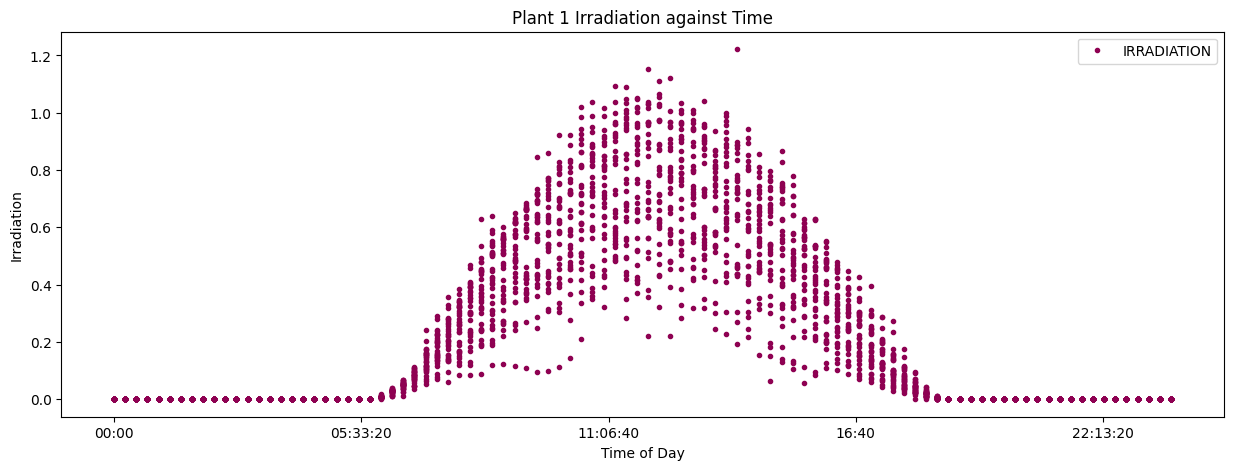

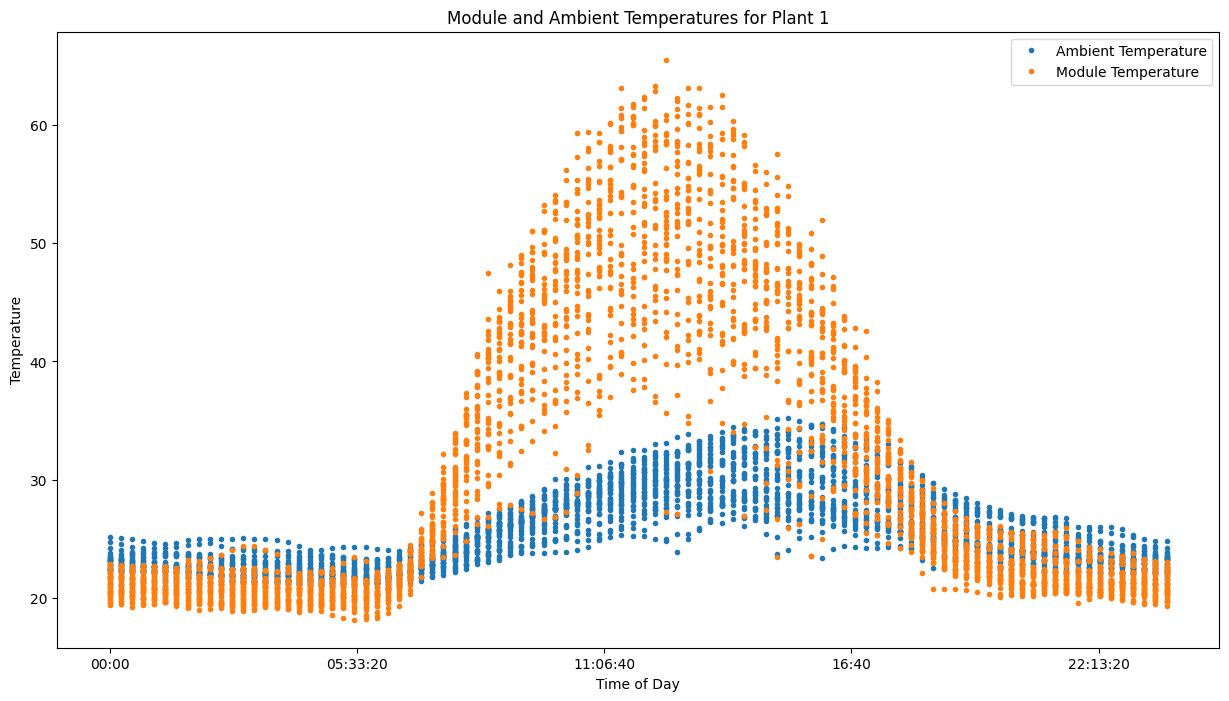

<Figure size 1500x800 with 0 Axes>

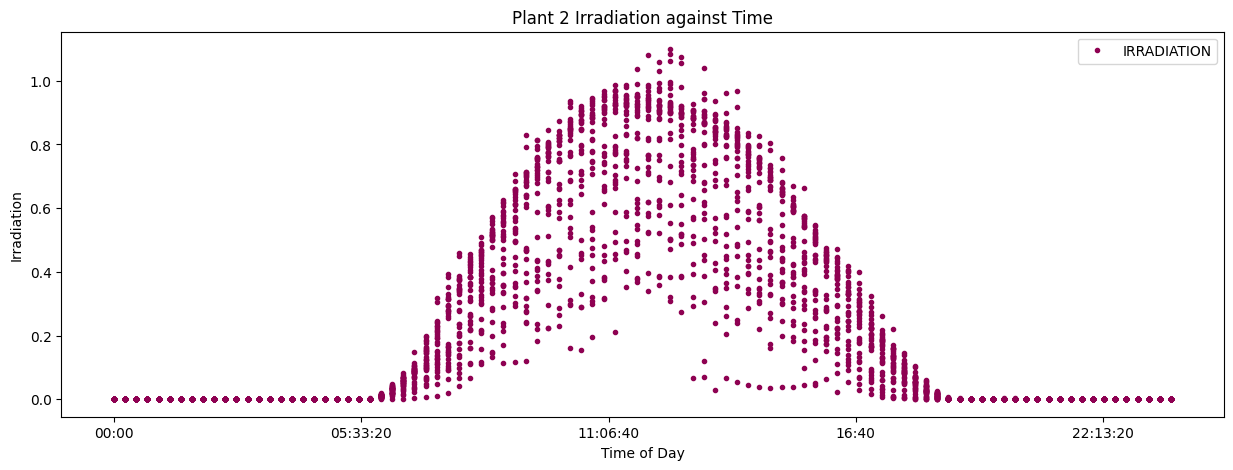

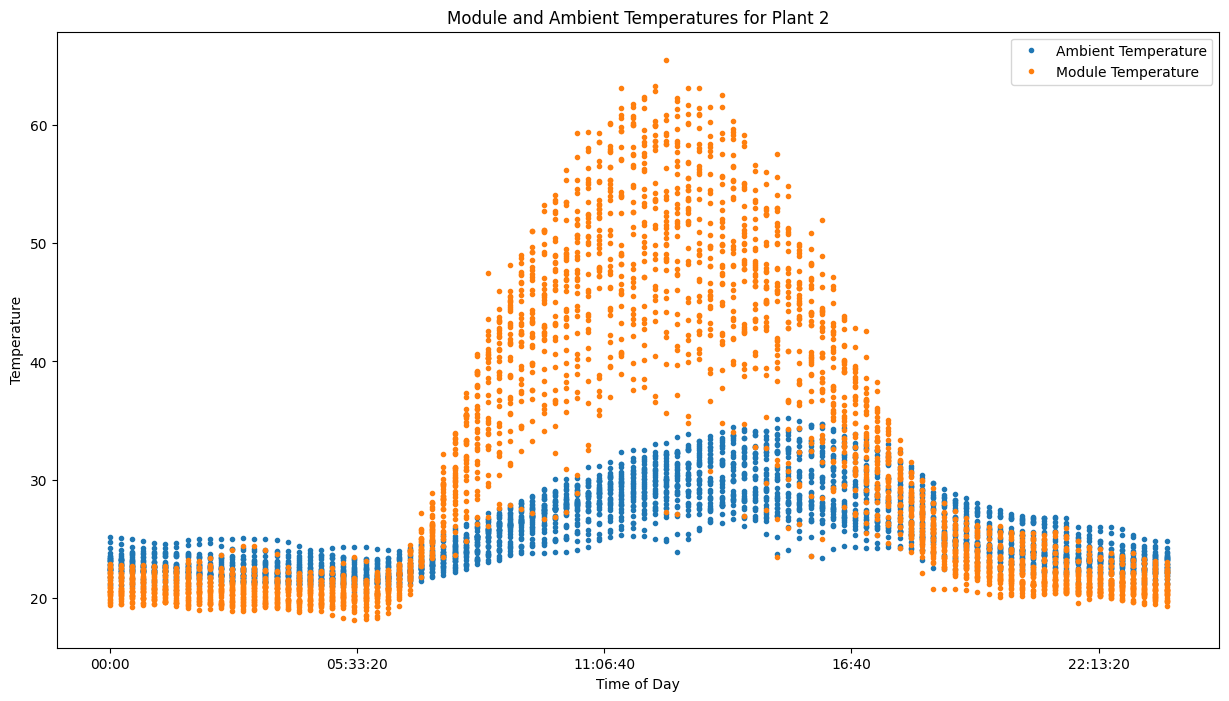

In [29]:
#Check Irradiation, Ambient Temperature, and Module Tmeperature againts time in a day for each Plant

#Plant 1

##Irradiation by time
plt.figure(figsize=(15,8))
plant1_sensor_agg.plot(x= 'TIME', y='IRRADIATION', style='.', figsize = (15, 5), colormap='PiYG')
plt.ylabel('Irradiation')
plt.xlabel('Time of Day')
plt.title('Plant 1 Irradiation against Time')
plt.show()

##Ambient and Module Temperature by time
fig, ax = plt.subplots(figsize=(15, 8))
plant1_sensor_agg.plot(x='TIME', y='AMBIENT_TEMPERATURE', style='.', label='Ambient Temperature', ax=ax)
plant1_sensor_agg.plot(x='TIME', y='MODULE_TEMPERATURE', style='.', label='Module Temperature', ax=ax)
plt.title('Module and Ambient Temperatures for Plant 1')
plt.xlabel('Time of Day')
plt.ylabel('Temperature')
plt.show()

#Plant 2

##Irradiation by time
plt.figure(figsize=(15,8))
plant2_sensor_agg.plot(x= 'TIME', y='IRRADIATION', style='.', figsize = (15, 5), colormap='PiYG')
plt.ylabel('Irradiation')
plt.xlabel('Time of Day')
plt.title('Plant 2 Irradiation against Time')
plt.show()

##Ambient and Module Temperature by time
fig, ax = plt.subplots(figsize=(15, 8))
plant1_sensor_agg.plot(x='TIME', y='AMBIENT_TEMPERATURE', style='.', label='Ambient Temperature', ax=ax)
plant1_sensor_agg.plot(x='TIME', y='MODULE_TEMPERATURE', style='.', label='Module Temperature', ax=ax)
plt.title('Module and Ambient Temperatures for Plant 2')
plt.xlabel('Time of Day')
plt.ylabel('Temperature')
plt.show()

* Ambient temperature goes down much later in the evening as compared to module temperature. This could mean that the specific heat capacity of the module is much lower than the specific heat capacity of the surrounding atmosphere making it took more energy to cool it down

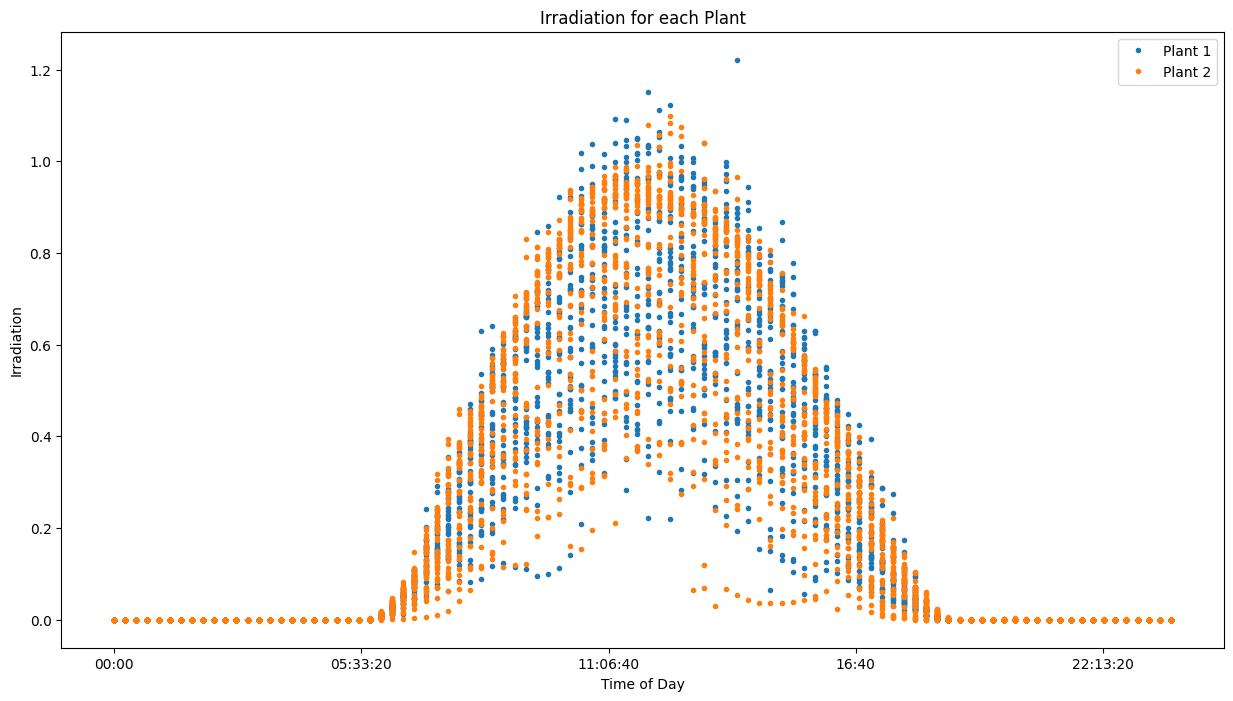

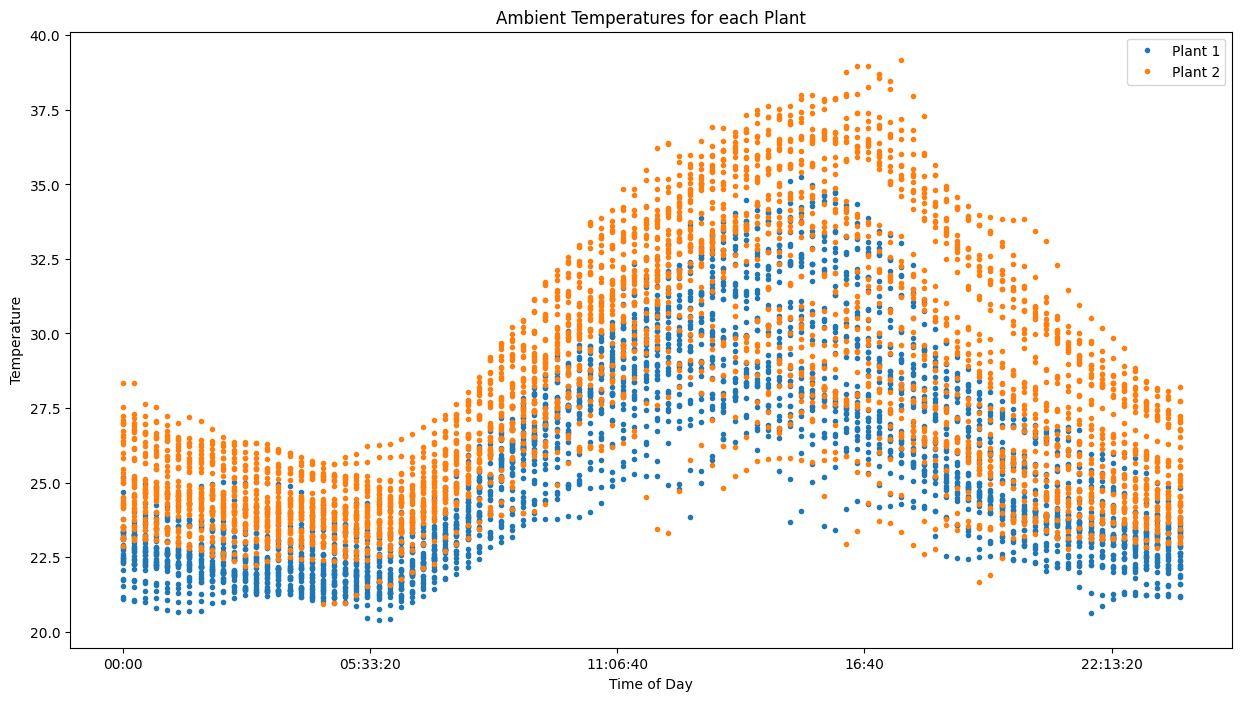

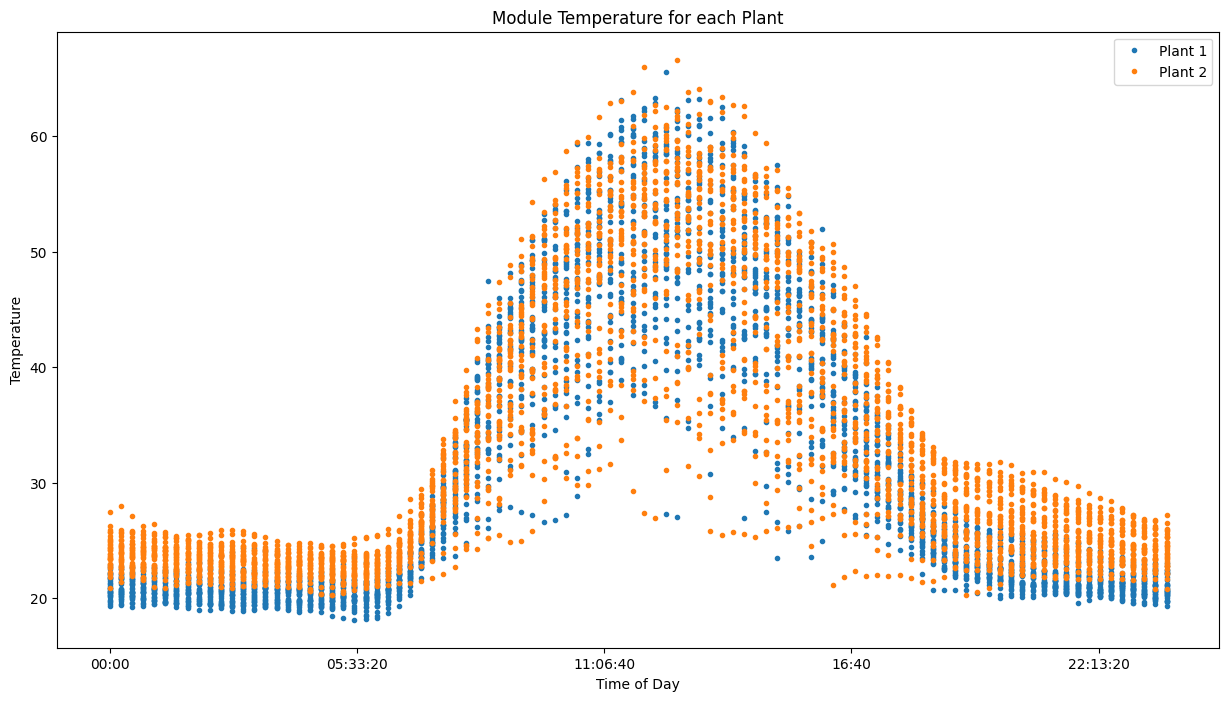

In [30]:
#Comparison of Irradiation, Ambient Temperature, and Module Tmeperature againts time in a day for each Plant

##Irradiation by time
fig, ax = plt.subplots(figsize=(15, 8))
plant1_sensor_agg.plot(x='TIME', y='IRRADIATION', style='.', label='Plant 1', ax=ax)
plant2_sensor_agg.plot(x='TIME', y='IRRADIATION', style='.', label='Plant 2', ax=ax)
plt.title('Irradiation for each Plant')
plt.xlabel('Time of Day')
plt.ylabel('Irradiation')
plt.show()

##Ambient Temperature by time
fig, ax = plt.subplots(figsize=(15, 8))
plant1_sensor_agg.plot(x='TIME', y='AMBIENT_TEMPERATURE', style='.', label='Plant 1', ax=ax)
plant2_sensor_agg.plot(x='TIME', y='AMBIENT_TEMPERATURE', style='.', label='Plant 2', ax=ax)
plt.title('Ambient Temperatures for each Plant')
plt.xlabel('Time of Day')
plt.ylabel('Temperature')
plt.show()

##Module Temperature by time
fig, ax = plt.subplots(figsize=(15, 8))
plant1_sensor_agg.plot(x='TIME', y='MODULE_TEMPERATURE', style='.', label='Plant 1', ax=ax)
plant2_sensor_agg.plot(x='TIME', y='MODULE_TEMPERATURE', style='.', label='Plant 2', ax=ax)
plt.title('Module Temperature for each Plant')
plt.xlabel('Time of Day')
plt.ylabel('Temperature')
plt.show()

* Plant 2 has more extreme values/outliers in irradiation
* Plant 2 has higher ambient temperature values across all hours

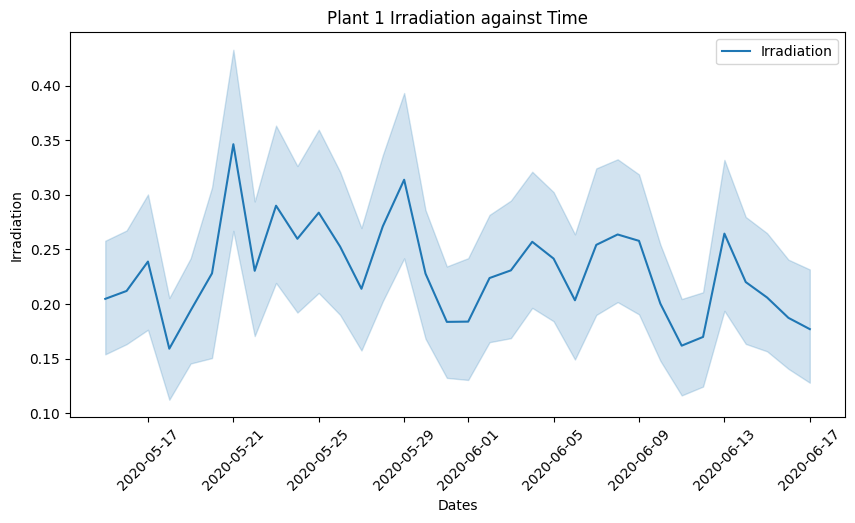

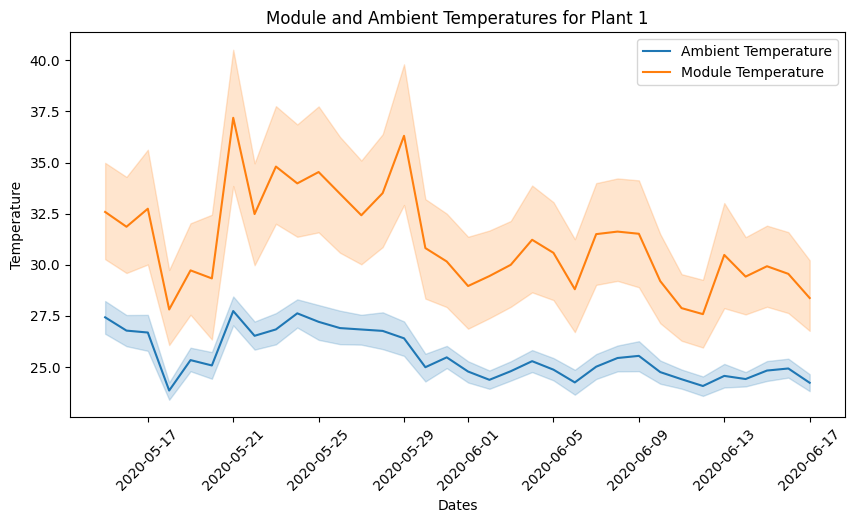

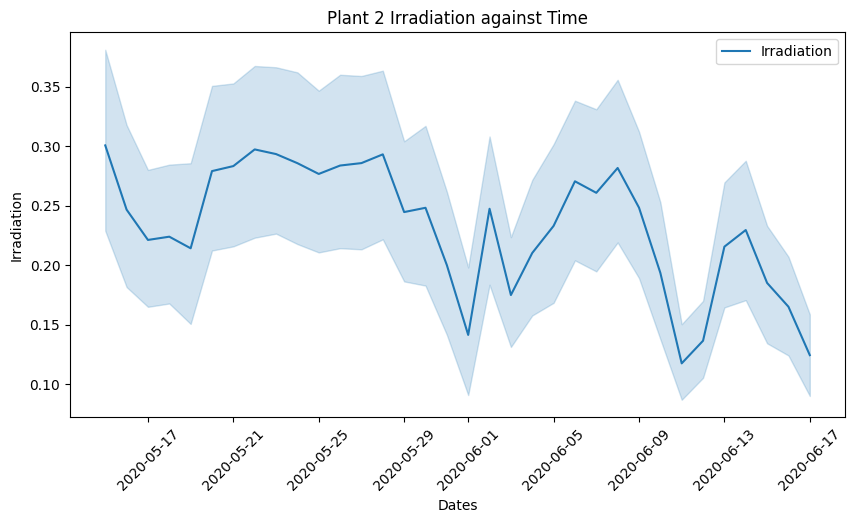

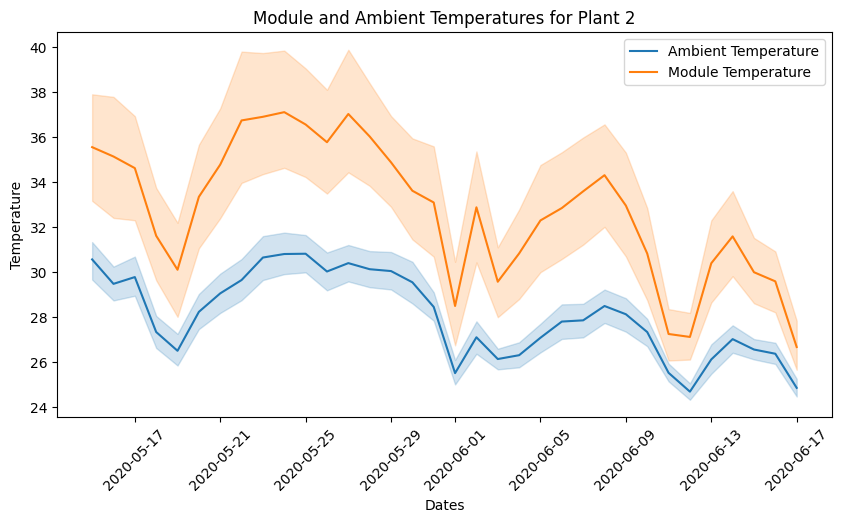

In [31]:
#Check Irradiation, Ambient Temperature, and Module Tmeperature againts time in a day for each Plant

#Plant 1

##Irradiation by dates
plt.figure(figsize=(10,5))
sns.lineplot(data=plant1_sensor_agg, x='DATE', y='IRRADIATION', err_style='band', label='Irradiation')
plt.ylabel('Irradiation')
plt.xlabel('Dates')
plt.xticks(rotation=45)
plt.title('Plant 1 Irradiation against Time')
plt.show()

##Ambient and Module Temperature by dates
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=plant1_sensor_agg, x='DATE', y='AMBIENT_TEMPERATURE', err_style='band', label='Ambient Temperature')
sns.lineplot(data=plant1_sensor_agg, x='DATE', y='MODULE_TEMPERATURE', err_style='band', label='Module Temperature')
plt.title('Module and Ambient Temperatures for Plant 1')
plt.xlabel('Dates')
plt.xticks(rotation=45)
plt.ylabel('Temperature')
plt.show()

#Plant 2

##Irradiation by dates
plt.figure(figsize=(10,5))
sns.lineplot(data=plant2_sensor_agg, x='DATE', y='IRRADIATION', err_style='band', label='Irradiation')
plt.ylabel('Irradiation')
plt.xlabel('Dates')
plt.xticks(rotation=45)
plt.title('Plant 2 Irradiation against Time')
plt.show()

##Ambient and Module Temperature by dates
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=plant2_sensor_agg, x='DATE', y='AMBIENT_TEMPERATURE', err_style='band', label='Ambient Temperature')
sns.lineplot(data=plant2_sensor_agg, x='DATE', y='MODULE_TEMPERATURE', err_style='band', label='Module Temperature')
plt.title('Module and Ambient Temperatures for Plant 2')
plt.xlabel('Dates')
plt.xticks(rotation=45)
plt.ylabel('Temperature')
plt.show()

As we can see that module temperature is always higher thatn ambient temperature

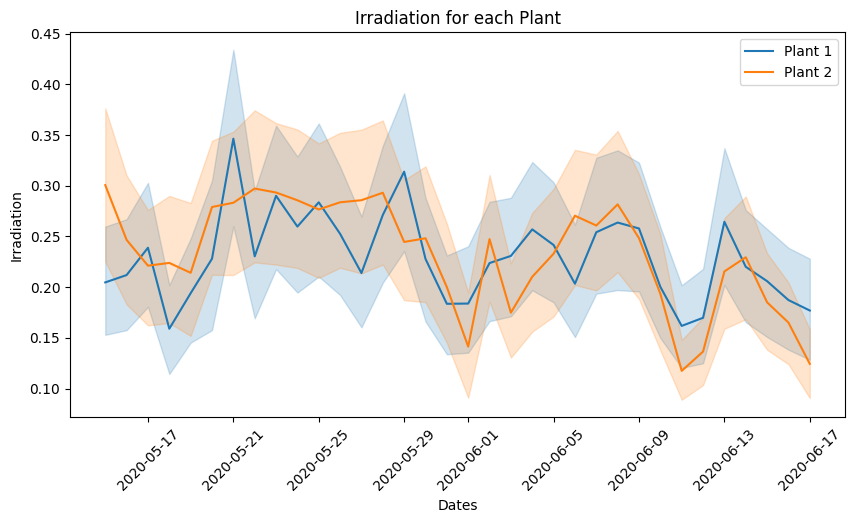

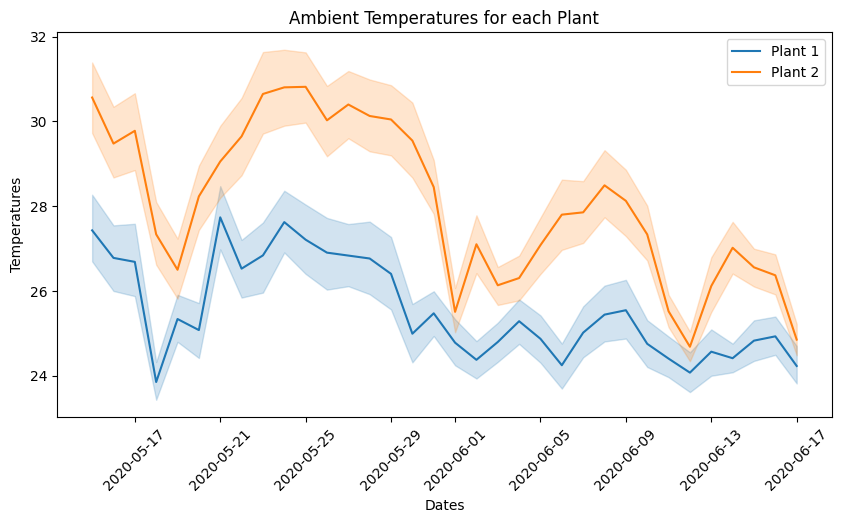

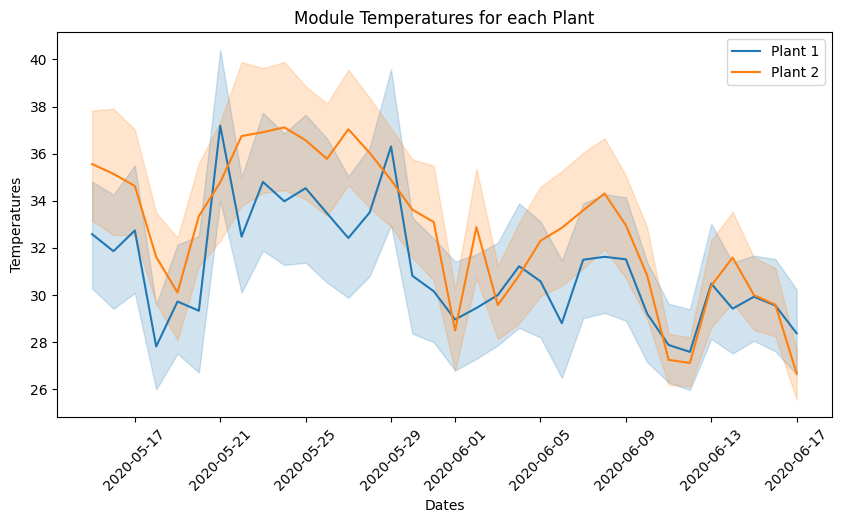

In [32]:
#Comparison of Irradiation, Ambient Temperature, and Module Tmeperature againts time in a day for each Plant

##Irradiation by dates
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=plant1_sensor_agg, x='DATE', y='IRRADIATION', err_style='band', label='Plant 1', ax=ax)
sns.lineplot(data=plant2_sensor_agg, x='DATE', y='IRRADIATION', err_style='band', label='Plant 2', ax=ax)
plt.title('Irradiation for each Plant')
plt.xlabel('Dates')
plt.xticks(rotation=45)
plt.ylabel('Irradiation')
plt.show()

##Ambient Temperature by dates
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=plant1_sensor_agg, x='DATE', y='AMBIENT_TEMPERATURE', err_style='band', label='Plant 1', ax=ax)
sns.lineplot(data=plant2_sensor_agg, x='DATE', y='AMBIENT_TEMPERATURE', err_style='band', label='Plant 2', ax=ax)
plt.title('Ambient Temperatures for each Plant')
plt.xlabel('Dates')
plt.xticks(rotation=45)
plt.ylabel('Temperatures')
plt.show()

##Module Temperature by dates
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=plant1_sensor_agg, x='DATE', y='MODULE_TEMPERATURE', err_style='band', label='Plant 1', ax=ax)
sns.lineplot(data=plant2_sensor_agg, x='DATE', y='MODULE_TEMPERATURE', err_style='band', label='Plant 2', ax=ax)
plt.title('Module Temperatures for each Plant')
plt.xlabel('Dates')
plt.xticks(rotation=45)
plt.ylabel('Temperatures')
plt.show()

* Both plants exhibit similar mean solar irradiation values.
* Plant 1 generally maintains a slightly lower mean module temperature compared to Plant 2.
* The mean ambient temperature at Plant 1 is notably lower than that at Plant 2.
* Plant 1, situated in a colder region of India, is at a higher elevation compared to Plant 2, providing a plausible explanation for the similar solar irradiation levels.

# Merge Generation and Sensor Data For Each Plant

In [33]:
#Plant 1 merge data
plant1_merge = plant1_generation_agg.merge(plant1_sensor_agg, on='DATE_TIME')

#Remove the separated date and time columns
plant1_merge.drop(columns =['TIME_x', 'DATE_x', 'TIME_y', 'DATE_y'], inplace=True)

plant1_merge.head(10)

DATE_TIME  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-06-01 00:00:00       0.0       0.0      5407.25  153519480.0   
1 2020-06-01 00:15:00       0.0       0.0         0.00  153519480.0   
2 2020-06-01 00:30:00       0.0       0.0         0.00  153519480.0   
3 2020-06-01 00:45:00       0.0       0.0         0.00  153519480.0   
4 2020-06-01 01:00:00       0.0       0.0         0.00  153519480.0   
5 2020-06-01 01:15:00       0.0       0.0         0.00  153519480.0   
6 2020-06-01 01:30:00       0.0       0.0         0.00  153519480.0   
7 2020-06-01 01:45:00       0.0       0.0         0.00  153519480.0   
8 2020-06-01 02:00:00       0.0       0.0         0.00  153519480.0   
9 2020-06-01 02:15:00       0.0       0.0         0.00  153519480.0   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0            23.128673           20.464305          0.0  
1            23.032562           20.341429          0.0  
2            22.967493           20.269493          0.0  
3            22.810594           20.198918          0.0  
4            22.611436           20.085866          0.0  
5            22.497412           20.263627          0.0  
6            22.348948           20.201571          0.0  
7            22.151638           20.045486          0.0  
8            21.993119           19.941203          0.0  
9            21.974262           20.068544          0.0

In [34]:
#Plant 2 merge data
plant2_merge = plant2_generation_agg.merge(plant2_sensor_agg, on='DATE_TIME')

#Remove the separated date and time columns
plant2_merge.drop(columns =['TIME_x', 'DATE_x', 'TIME_y', 'DATE_y'], inplace=True)

plant2_merge.head(10)

DATE_TIME  DC_POWER  AC_POWER   DAILY_YIELD   TOTAL_YIELD  \
0 2020-05-15 00:00:00       0.0       0.0  48899.938095  1.418960e+10   
1 2020-05-15 00:15:00       0.0       0.0  28401.000000  1.418960e+10   
2 2020-05-15 00:30:00       0.0       0.0  28401.000000  1.418960e+10   
3 2020-05-15 00:45:00       0.0       0.0  28401.000000  1.418960e+10   
4 2020-05-15 01:00:00       0.0       0.0  26516.000000  1.418960e+10   
5 2020-05-15 01:15:00       0.0       0.0  18976.000000  1.418960e+10   
6 2020-05-15 01:30:00       0.0       0.0  18976.000000  1.418960e+10   
7 2020-05-15 01:45:00       0.0       0.0  18976.000000  1.418960e+10   
8 2020-05-15 02:00:00       0.0       0.0  18976.000000  1.418960e+10   
9 2020-05-15 02:15:00       0.0       0.0  18976.000000  1.418960e+10   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0            27.004764           25.060789          0.0  
1            26.880811           24.421869          0.0  
2            26.682055           24.427290          0.0  
3            26.500589           24.420678          0.0  
4            26.596148           25.088210          0.0  
5            26.512740           25.317970          0.0  
6            26.494339           25.217193          0.0  
7            26.420410           25.065062          0.0  
8            26.401946           24.691469          0.0  
9            26.226078           24.559481          0.0

In building the model we wont need the DATE_TIME feature, so we will drop that

In [35]:
#Drop DATE_TIME column
plant1_merge.drop(columns='DATE_TIME', inplace=True)
plant2_merge.drop(columns='DATE_TIME', inplace=True)

In [36]:
# Re-arrange the columns (AC_POWER in last)
df_1 = plant1_merge.drop(columns='AC_POWER')
df_2 = plant1_merge['AC_POWER']
plant1_merge = pd.concat([df_1, df_2], axis='columns')

df_1 = plant2_merge.drop(columns='AC_POWER')
df_2 = plant2_merge['AC_POWER']
plant2_merge = pd.concat([df_1, df_2], axis='columns')

# Feature Selection

Let's check correlation and feature importance of features to target so that we can select relevant features in predicting AC Power

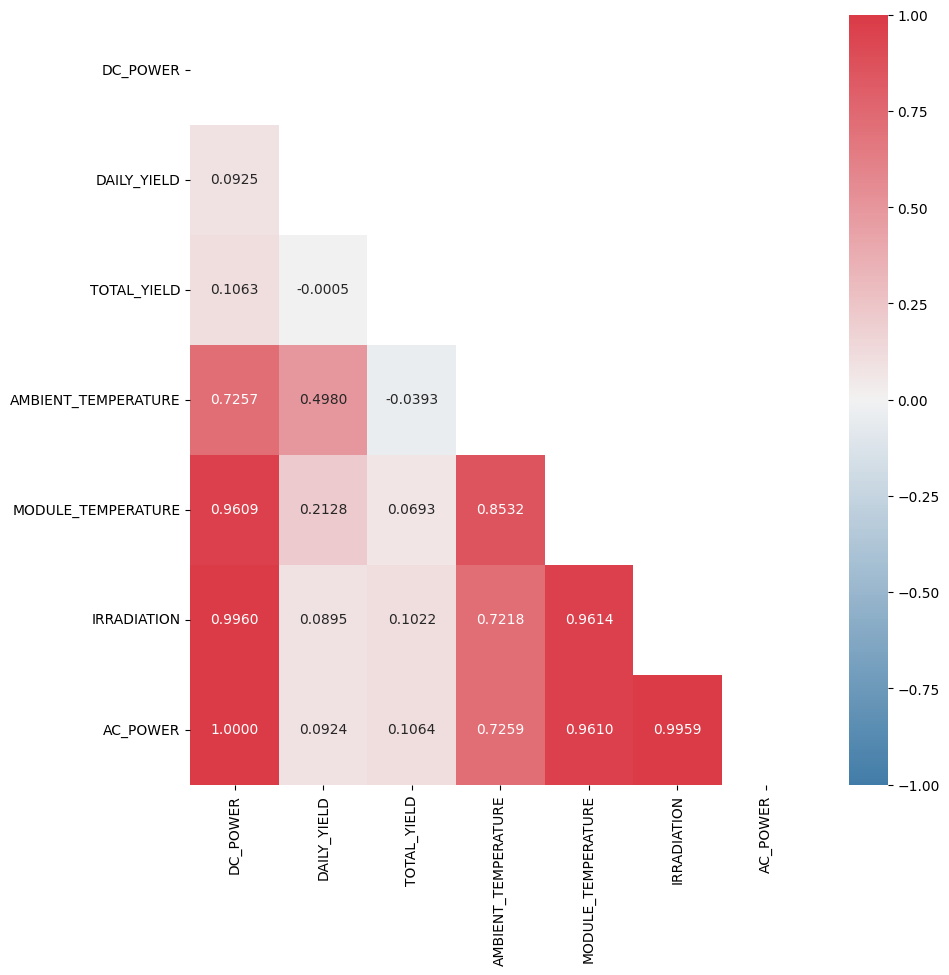

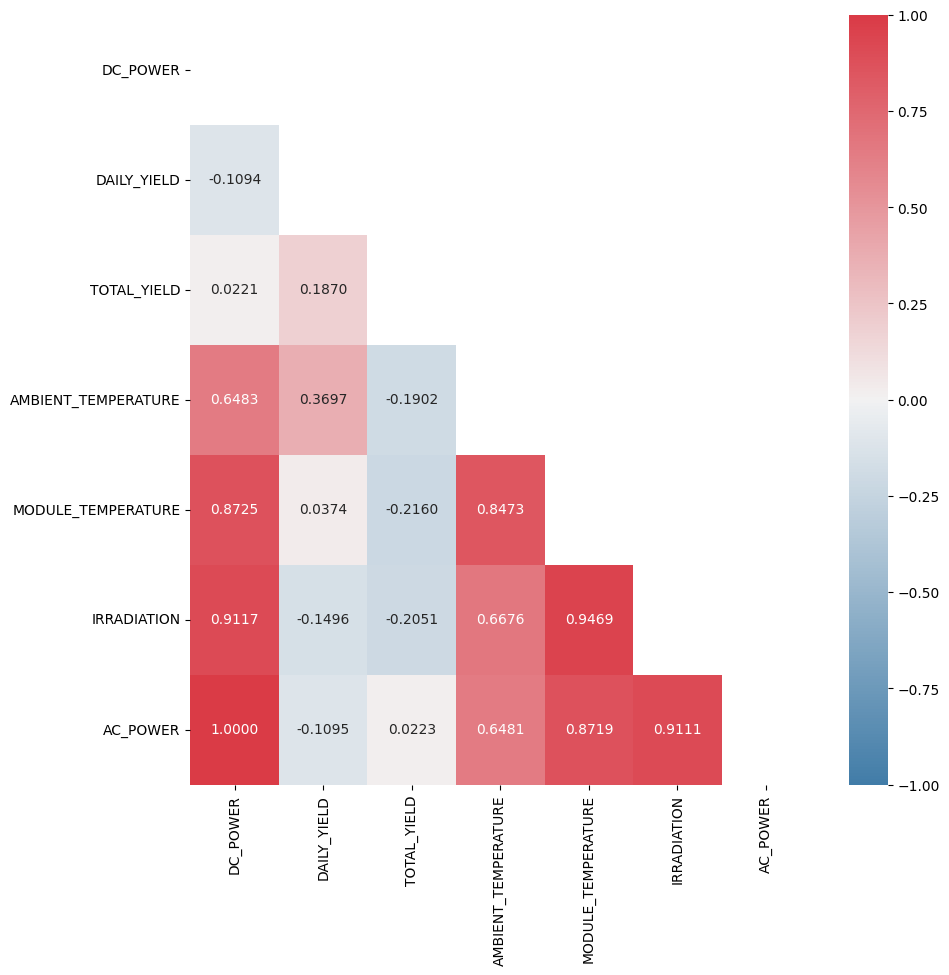

In [37]:
# Heatmap (corr pearson)

# Make new dataframe without ID column for each plant
merge1_corr = plant1_merge.corr(numeric_only=True, method='pearson')
merge2_corr = plant2_merge.corr(numeric_only=True, method='pearson')

# Plot correlation heatmap
merge1_mask = np.triu(np.ones_like(merge1_corr, dtype=bool))
merge2_mask = np.triu(np.ones_like(merge2_corr, dtype=bool))

plt.figure(figsize=(10,10))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = merge1_corr, cmap=cmap_custom, mask=merge1_mask, annot=True, fmt='.4f', vmin=-1, vmax=1)
plt.show()

plt.figure(figsize=(10,10))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = merge2_corr, cmap=cmap_custom, mask=merge2_mask, annot=True, fmt='.4f', vmin=-1, vmax=1)
plt.show()

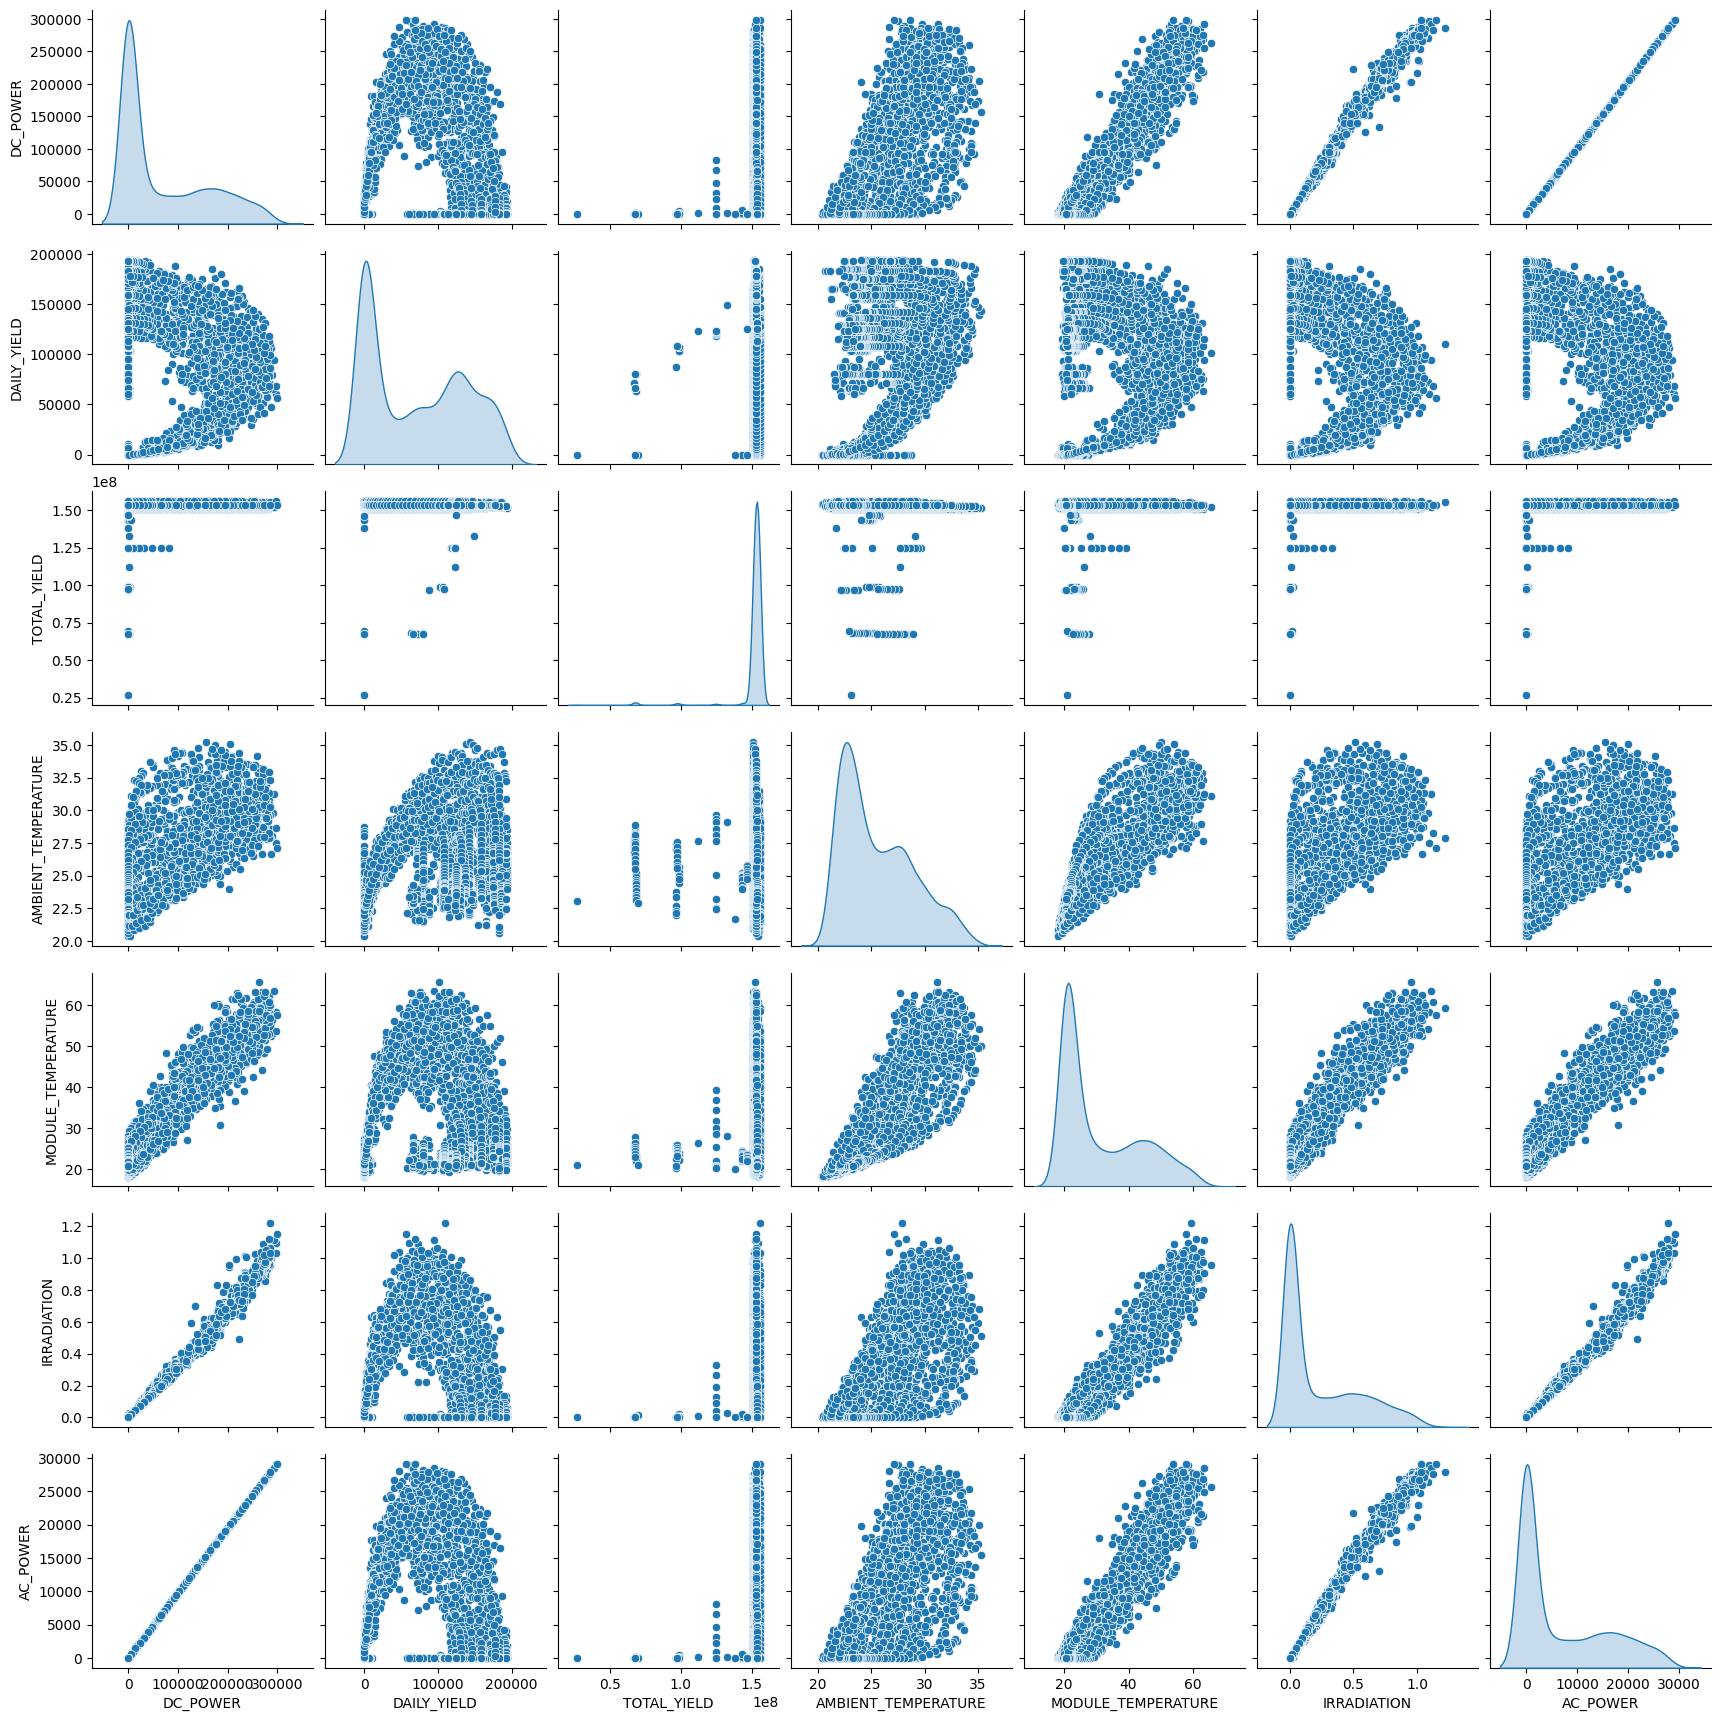

In [38]:
# Pairplot for Plant 1
sns.pairplot(data=plant1_merge, diag_kind='kde')
plt.show()

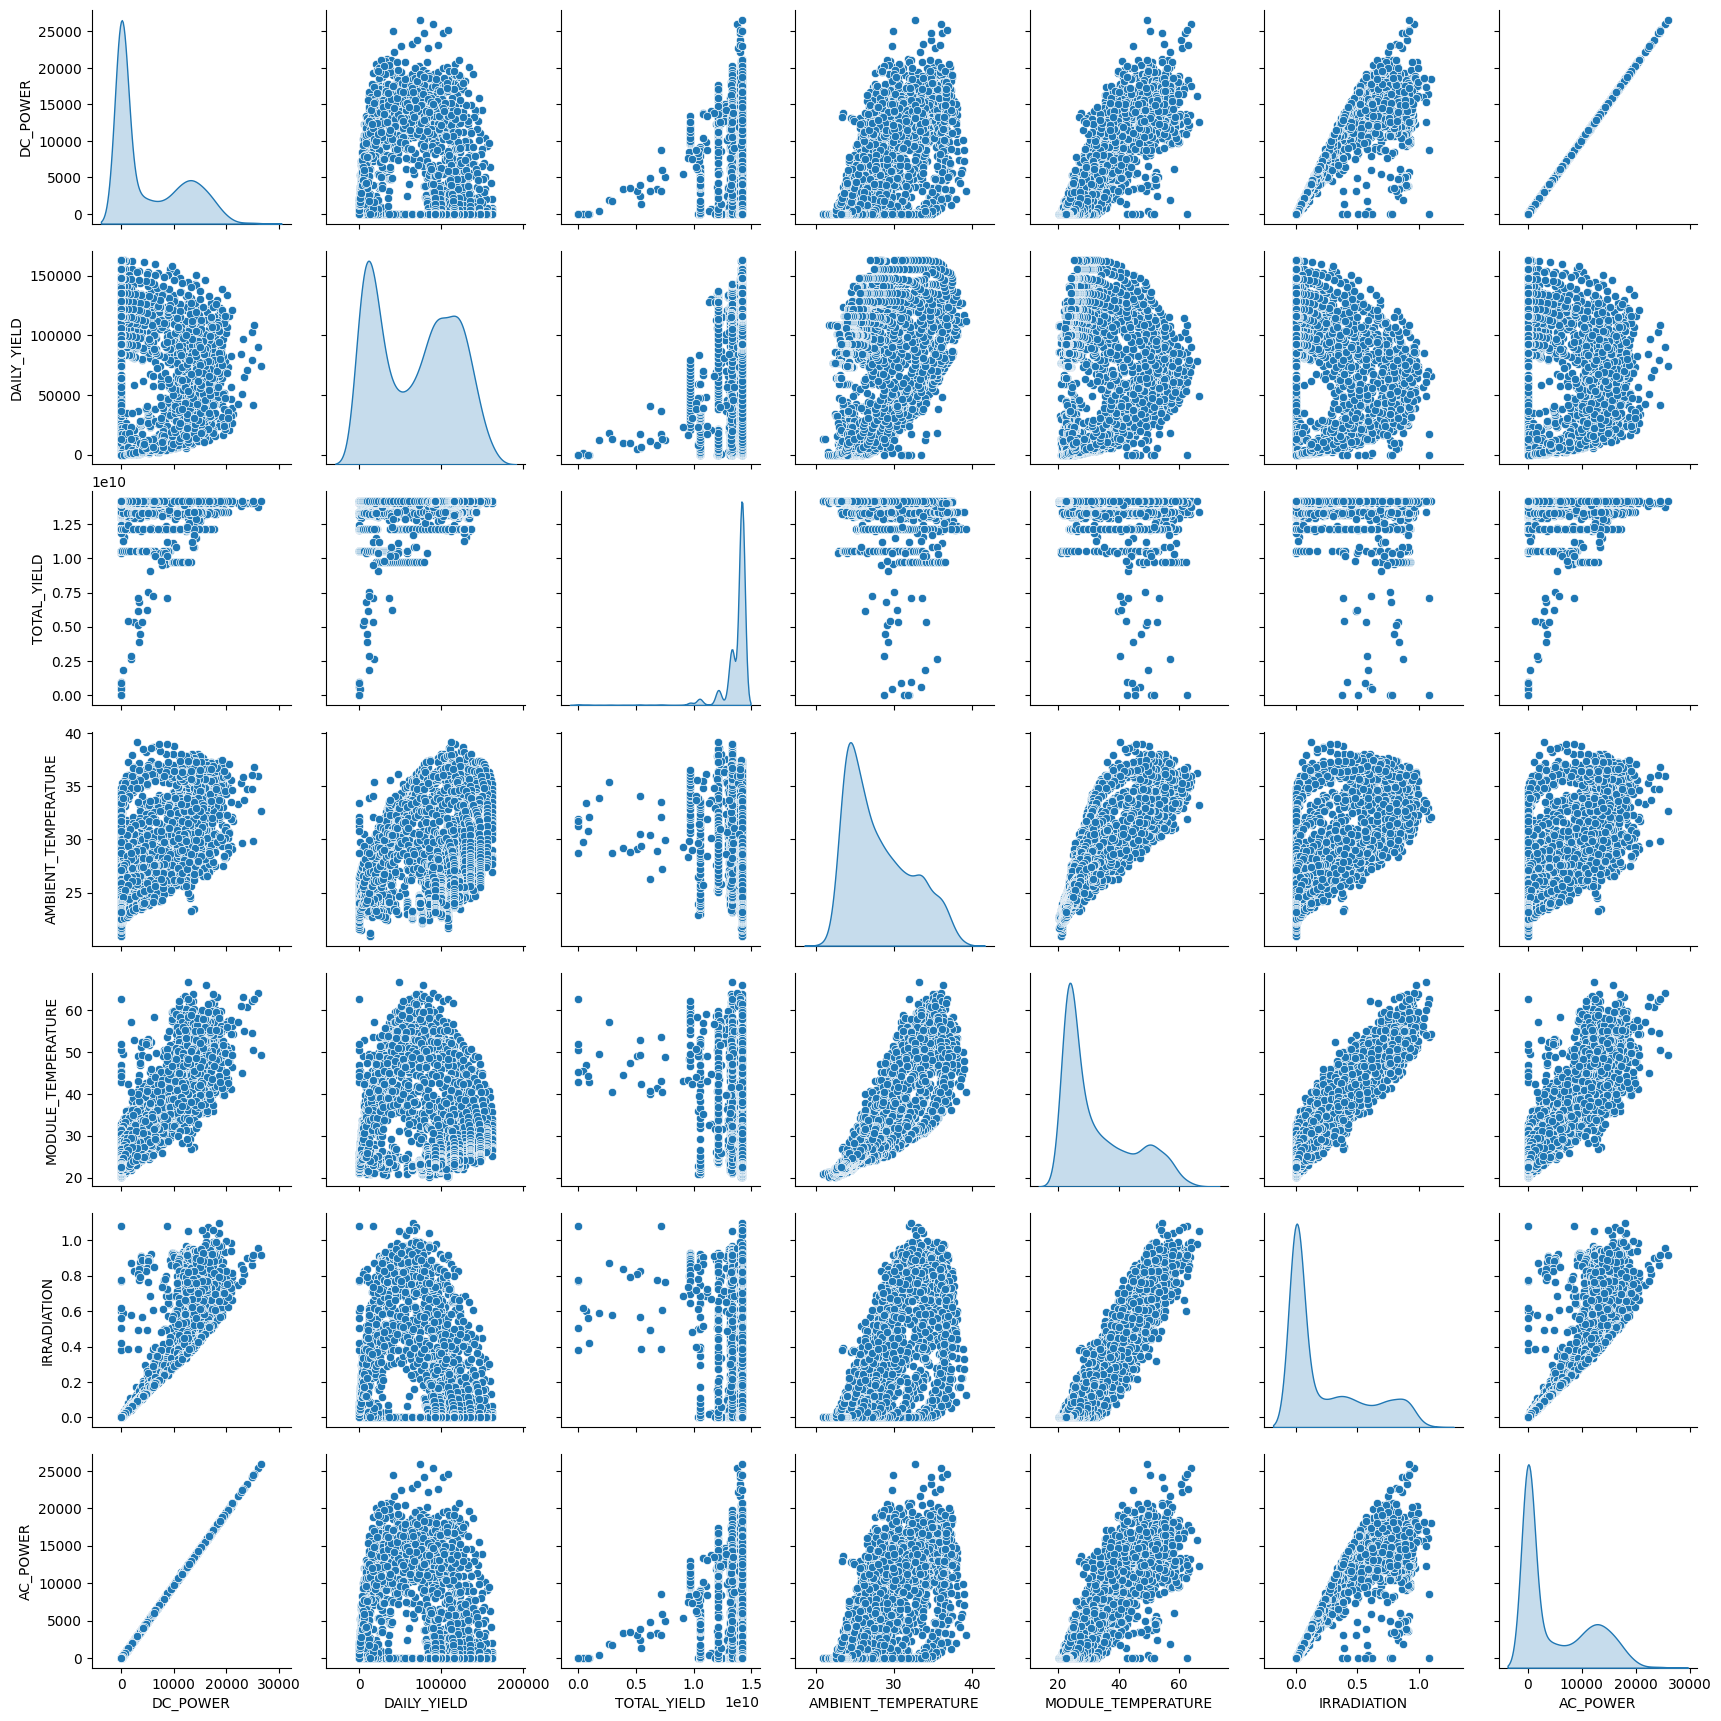

In [39]:
# Pairplot for Plant 2
sns.pairplot(data=plant2_merge, diag_kind='kde')
plt.show()

**Reminder About SelectKbest in Regression**

In scikit-learn, `f_regression` and `mutual_info_regression` are both methods for feature selection in regression problems, but they operate based on different principles.

1. **`f_regression`**:

   - **Methodology**: It uses the F-statistic to evaluate the linear dependency between each feature and the target variable. It assesses the linear relationship between each feature and the target, considering the overall variance explained by the model.

   - **Suitability**: It is appropriate when you expect linear relationships between your features and the target variable. If your features have linear correlation with the target, `f_regression` can be a suitable choice.

2. **`mutual_info_regression`**:

   - **Methodology**: It calculates the mutual information between each feature and the target. Mutual information measures the amount of information one variable contains about another. It can capture any type of statistical dependency, not limited to linear relationships.

   - **Suitability**: It is suitable when the relationship between the features and the target is not necessarily linear. If the relationship is more complex or non-linear, `mutual_info_regression` may provide better results.

**Choosing between them**:

- If you believe that the relationship between your features and the target is primarily linear, `f_regression` might be a good starting point.

- If you want to capture non-linear relationships or any form of statistical dependency, or if you are unsure about the nature of the relationships, you might consider using `mutual_info_regression`.

It's often a good practice to try both methods and compare their results or even combine them for a more comprehensive feature selection approach. Keep in mind that the effectiveness of these methods can also depend on the specific characteristics of your dataset.

In [40]:
#Calculation of feature importance score to target (numerical feature - numerical target)

from sklearn.feature_selection import SelectKBest, f_regression

# Separate features and target variable
x_features_test = plant1_merge.drop(columns=['AC_POWER'])  # Features
y_target_test = plant1_merge['AC_POWER']  # Target variable

# Instantiate SelectKBest
k_best = SelectKBest(score_func=f_regression, k='all')  # Use 'all' to see scores for all features

# Fit and transform the data
x_selected_features = k_best.fit_transform(x_features_test, y_target_test)

# Get scores and feature names
feature_scores = k_best.scores_
feature_names = x_features_test.columns

# Create a DataFrame to display feature scores
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the feature scores
print(feature_scores_df)

               Feature         Score
0             DC_POWER  5.623727e+08
5          IRRADIATION  3.790293e+05
4   MODULE_TEMPERATURE  3.810963e+04
3  AMBIENT_TEMPERATURE  3.513781e+03
2          TOTAL_YIELD  3.612723e+01
1          DAILY_YIELD  2.717058e+01


In [41]:
#Calculation of feature importance score to target (numerical feature - numerical target)

from sklearn.feature_selection import SelectKBest, f_regression

# Separate features and target variable
x_features_test = plant2_merge.drop(columns=['AC_POWER'])  # Features
y_target_test = plant2_merge['AC_POWER']  # Target variable

# Instantiate SelectKBest
k_best = SelectKBest(score_func=f_regression, k='all')  # Use 'all' to see scores for all features

# Fit and transform the data
x_selected_features = k_best.fit_transform(x_features_test, y_target_test)

# Get scores and feature names
feature_scores = k_best.scores_
feature_names = x_features_test.columns

# Create a DataFrame to display feature scores
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the feature scores
print(feature_scores_df)

               Feature         Score
0             DC_POWER  4.413434e+08
5          IRRADIATION  1.591013e+04
4   MODULE_TEMPERATURE  1.032835e+04
3  AMBIENT_TEMPERATURE  2.358703e+03
1          DAILY_YIELD  3.954912e+01
2          TOTAL_YIELD  1.626579e+00


In this case since we got obvious correlation between AC and DC power, we wont be using DC power for our prediction. Also we wont use daily and total yield because they have low correlation to target

In [44]:
# Select only relevant features

plant1_model = plant1_merge.copy()
plant2_model = plant2_merge.copy()

selected_features = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'AC_POWER']

plant1_model = plant1_model[selected_features]
plant2_model = plant2_model[selected_features]

# Train-Test Split

## Train-Test Split Plant 1

In [45]:
# Spliting data into train-test
x1 = plant1_model.drop(columns=['AC_POWER'])
y1 = plant1_model[['AC_POWER']]

from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

## Train-Test Split Plant 2

In [46]:
# Spliting data into train-test
x2 = plant2_model.drop(columns=['AC_POWER'])
y2 = plant2_model[['AC_POWER']]

from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=42)

# Handle Outliers

In [47]:
#Make temporary dataframe of features and target for train set
plant1_handling_outliers = pd.concat([x1_train, y1_train], axis='columns')
plant2_handling_outliers = pd.concat([x2_train, y2_train], axis='columns')

In [48]:
columns_to_handle_outliers = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']

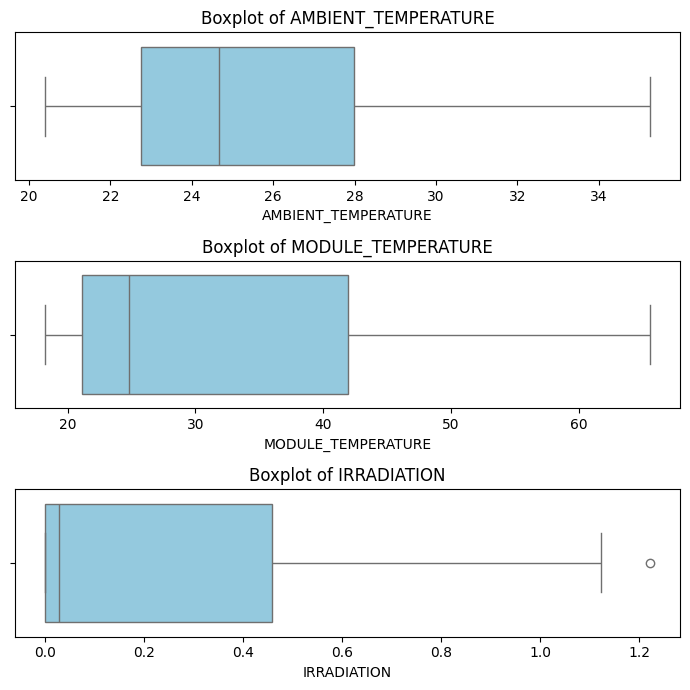

In [49]:
# Boxplot before handling outliers for Plant 1
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 7))
axes = axes.flatten()

for i in range(len(columns_to_handle_outliers)) :
  sns.boxplot(ax=axes[i], x=plant1_handling_outliers[columns_to_handle_outliers[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {columns_to_handle_outliers[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(columns_to_handle_outliers) < len(axes):
    axes[len(columns_to_handle_outliers)].remove()

plt.tight_layout()

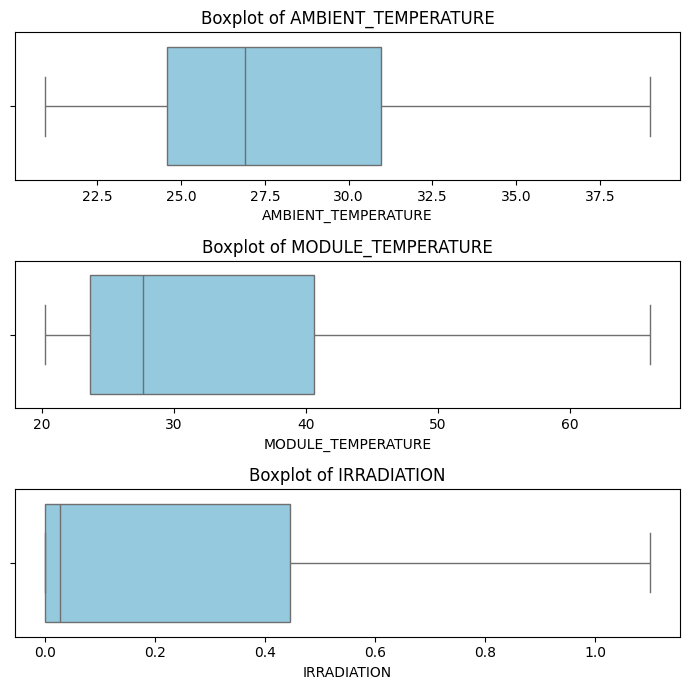

In [50]:
# Boxplot before handling outliers for Plant 2
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 7))
axes = axes.flatten()

for i in range(len(columns_to_handle_outliers)) :
  sns.boxplot(ax=axes[i], x=plant2_handling_outliers[columns_to_handle_outliers[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {columns_to_handle_outliers[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(columns_to_handle_outliers) < len(axes):
    axes[len(columns_to_handle_outliers)].remove()

plt.tight_layout()

In total, there is actually only 1 data point that have outlier here on Plant 1 and the value is not that far/extreme either, but just to be safe let's just handle that using IQR 

In [51]:
# Remove outliers with IQR method

print(f'The number of rows before filtering out outliers : {len(plant1_handling_outliers)}')

filtered_entries = np.array([True] * len(plant1_handling_outliers))

# Select features with outliers
for col in columns_to_handle_outliers:

    Q1 = plant1_handling_outliers[col].quantile(0.25)
    Q3 = plant1_handling_outliers[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filtered_entries = ((plant1_handling_outliers[col] >= lower_bound) & (plant1_handling_outliers[col] <= upper_bound)) & filtered_entries

df_train_handling_outliers = plant1_handling_outliers[filtered_entries]

print(f'The number of rows after filtering out outliers: {len(df_train_handling_outliers)}')

The number of rows before filtering out outliers : 2209
The number of rows after filtering out outliers: 2208


In [52]:
#Split the features and target for train set again
x1_train = df_train_handling_outliers.drop(columns='AC_POWER')
y1_train = df_train_handling_outliers['AC_POWER']

# Feature Scaling

Scaling will be done to train and test data

In [53]:
x1_train

AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
748             25.647653           23.230061     0.000000
2581            34.310097           46.149711     0.306096
662             23.465310           21.887561     0.000000
480             22.446710           19.740186     0.000000
803             26.633242           45.439112     0.650318
...                   ...                 ...          ...
3092            23.244623           26.083354     0.152250
1095            24.942493           36.774971     0.390469
1130            25.324770           24.317898     0.000143
1294            25.923041           38.486489     0.426235
860             22.892314           20.571364     0.000000

[2208 rows x 3 columns]

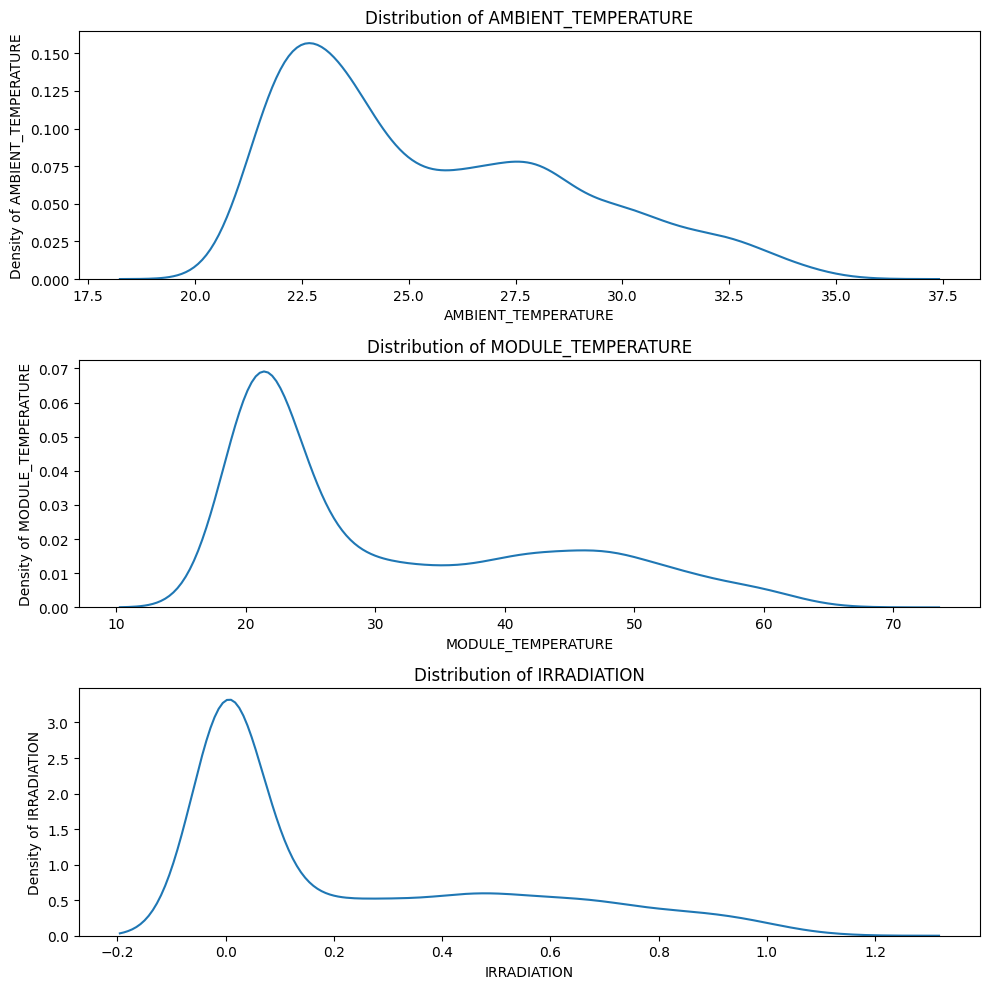

In [56]:
# Checking distribution before scaling for Plant 1
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
axes = axes.flatten()

for i in range(len(x1_train.columns)) :
    sns.kdeplot(ax=axes[i], x=x1_train[x1_train.columns[i]])
    axes[i].set_title(f'Distribution of {x1_train.columns[i]}')
    axes[i].set_ylabel(f'Density of {x1_train.columns[i]}')
    axes[i].set_xlabel(f'{x1_train.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(x1_train.columns) < len(axes) :
    axes[len(x1_train.columns)].remove()

plt.tight_layout()

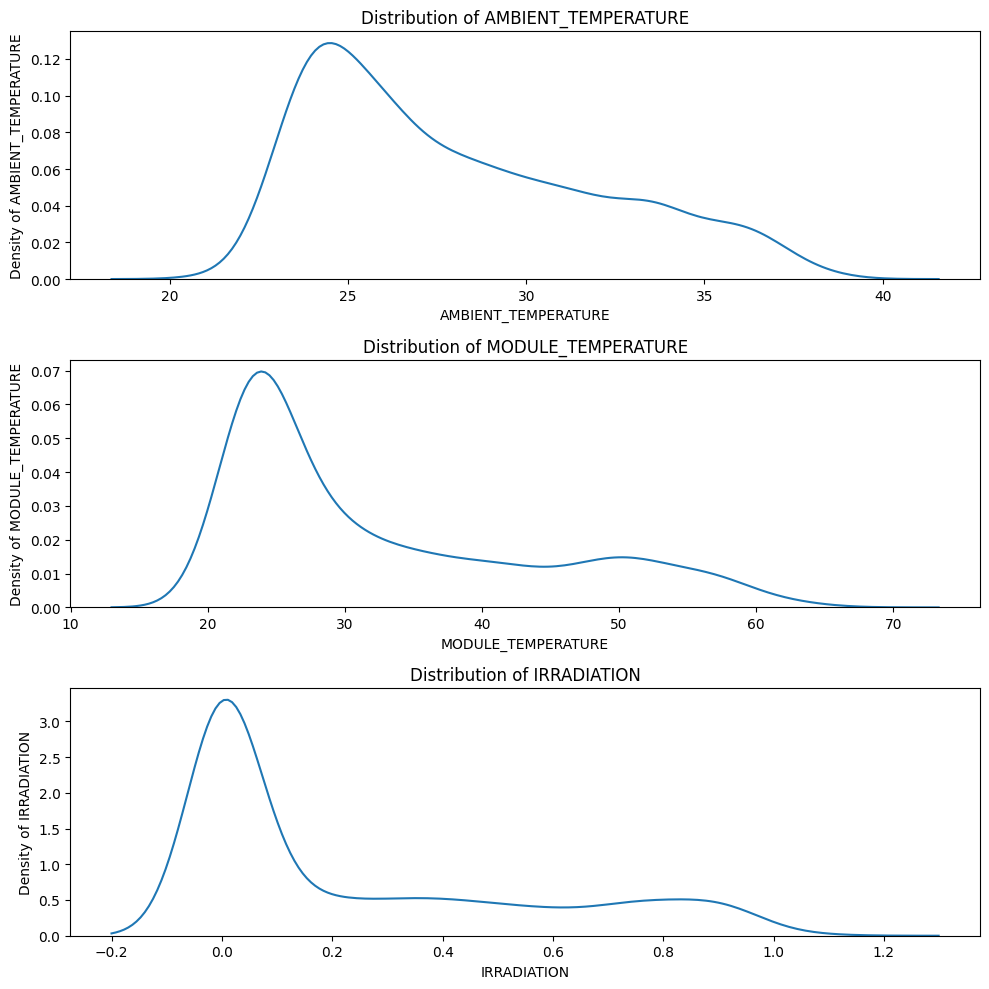

In [57]:
# Checking distribution before scaling for Plant 2
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
axes = axes.flatten()

for i in range(len(x2_train.columns)) :
    sns.kdeplot(ax=axes[i], x=x2_train[x2_train.columns[i]])
    axes[i].set_title(f'Distribution of {x2_train.columns[i]}')
    axes[i].set_ylabel(f'Density of {x2_train.columns[i]}')
    axes[i].set_xlabel(f'{x2_train.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(x1_train.columns) < len(axes) :
    axes[len(x2_train.columns)].remove()

plt.tight_layout()

All of feature distribution are right/positive skewed, so as for now we will try to use min-max scaler

In [58]:
#Normalization (MinMaxScaller)
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

columns_to_scale = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']

scale_features = x1_train[columns_to_scale]

for n in scale_features:
  x1_train[n] = ms.fit_transform(x1_train[[n]])
  x1_test[n] = ms.fit_transform(x1_test[[n]])
  # scaler.to_pickle(filename)

scale_features = x2_train[columns_to_scale]

for n in scale_features:
  x2_train[n] = ms.fit_transform(x2_train[[n]])
  x2_test[n] = ms.fit_transform(x2_test[[n]])
  # scaler.to_pickle(filename)

In [54]:
# #Standardization (Z-score normalization)
# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()

# columns_to_scale = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']

# scale_features = x_train[columns_to_scale]
# for n in scale_features:
#   x_train[n] = ss.fit_transform(x_train[[n]])
#   x_test[n] = ss.fit_transform(x_test[[n]])
#   # scaler.to_pickle(filename)

In [62]:
# # Checking distribution after scaling for Plant 1
# fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
# axes = axes.flatten()

# for i in range(len(x1_train.columns)) :
#     sns.kdeplot(ax=axes[i], x=x1_train[x1_train.columns[i]])
#     axes[i].set_title(f'Distribution of {x1_train.columns[i]}')
#     axes[i].set_ylabel(f'Density of {x1_train.columns[i]}')
#     axes[i].set_xlabel(f'{x1_train.columns[i]}')

# # Remove the last subplot if there are fewer features than subplots
# if len(x1_train.columns) < len(axes) :
#     axes[len(x1_train.columns)].remove()

# plt.tight_layout()

In [61]:
# # Checking distribution after scaling for Plant 2
# fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
# axes = axes.flatten()

# for i in range(len(x2_train.columns)) :
#     sns.kdeplot(ax=axes[i], x=x2_train[x2_train.columns[i]])
#     axes[i].set_title(f'Distribution of {x2_train.columns[i]}')
#     axes[i].set_ylabel(f'Density of {x2_train.columns[i]}')
#     axes[i].set_xlabel(f'{x2_train.columns[i]}')

# # Remove the last subplot if there are fewer features than subplots
# if len(x1_train.columns) < len(axes) :
#     axes[len(x2_train.columns)].remove()

# plt.tight_layout()

# Modelling

## Train Regression Models

In [67]:
#Check the amount of training and test data for Plant 1
print(f'Rows of training data : {len(x1_train)}')
print(f'Rows of test data : {len(x1_test)}')

Rows of training data : 2208
Rows of test data : 948


In [68]:
#Check the amount of training and test data for Plant 2
print(f'Rows of training data : {len(x2_train)}')
print(f'Rows of test data : {len(x2_test)}')

Rows of training data : 2281
Rows of test data : 978


Unfortunetly, The amount of training and test data in this case is quite low, so i don't think we will get an optimal result. But we will just see the result for now

In [69]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x1_train, y1_train)
lr.fit(x2_train, y2_train)

LinearRegression()

In [70]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()

ridge.fit(x1_train, y1_train)
ridge.fit(x2_train, y2_train)

Ridge()

In [71]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()

lasso.fit(x1_train, y1_train)
lasso.fit(x2_train, y2_train)

Lasso()

In [72]:
# Elastic Net Regression
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()

elasticnet.fit(x1_train, y1_train)
elasticnet.fit(x2_train, y2_train)

ElasticNet()

In [73]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

dt.fit(x1_train, y1_train)
dt.fit(x2_train, y2_train)

DecisionTreeRegressor()

In [74]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(x1_train, y1_train)
rf.fit(x2_train, y2_train)

RandomForestRegressor()

In [75]:
# Support Vector Regression
from sklearn.svm import SVR
svr = SVR()

svr.fit(x1_train, y1_train)
svr.fit(x2_train, y2_train)

SVR()

In [76]:
# Boosting : AdaBoost Regression
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()

ab.fit(x1_train, y1_train)
ab.fit(x2_train, y2_train)

AdaBoostRegressor()

In [77]:
# Boosting : XGBoost Regression
from xgboost import XGBRegressor
xg = XGBRegressor()

xg.fit(x1_train, y1_train)
xg.fit(x2_train, y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Model Evaluation

* As for now this is separated for plant 1 and 2, i will change it later to combine in 1 function.
* Lower values of MAE, MSE, and RMSE generally indicate higher precision, with RMSE values interpreted in kilowatts (kW) serving as our primary metric.

### Plant 1

In [92]:
#Import metrics score that will be evalueated
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

#Function for model evaluation metrics score
def eval_regression(model):
  y1_pred = model.predict(x1_test)
  y1_pred_train = model.predict(x1_train)

  # print('MAE (train): ' + str(mean_absolute_error(y_test, y_pred_train)))
  print('MAE (test): ' + str(mean_absolute_error(y1_test, y1_pred)))

  # print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))
  print('RMSE (test): ' + str(mean_squared_error(y1_test, y1_pred, squared=False)))

  # print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train, y_pred_train)))
  print('MAPE (test): ' + str(mean_absolute_percentage_error(y1_test, y1_pred)))

  # print('R2 (train): ' + str(r2_score(y_train, y_pred_train)))
  print('R2 (test): ' + str(r2_score(y1_test, y1_pred)))

  #Cross Validation
  score = cross_validate(model, x1_train, y1_train, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True) #scoring change based on what metrics we want to validate (usually choose the main performance metric)
  print('RMSE Score (crossval train): '+ str((-1) * score['train_score'].mean()))
  print('RMSE Score (crossval test): '+ str((-1) * score['test_score'].mean()))

  score = cross_validate(model, x1_train, y1_train, cv=5, scoring='r2', return_train_score=True) #scoring change based on what metrics we want to validate (usually choose the main performance metric)
  print('R2 Score (crossval train): '+ str(score['train_score'].mean()))
  print('R2 Score (crossval test): '+ str(score['test_score'].mean()))


In [93]:
#Printing metrics score for all models to compare

#Linear Regression
print('\nEvaluate LinearRegression')
eval_regression(lr)

#Ridge Regressor
print('\nEvaluate RidgeRegression')
eval_regression(ridge)

#Lasso Regressor
print('\nEvaluate LassoRegression')
eval_regression(lasso)

#Elastic Net Regressor
print('\nEvaluate ElasticNetRegression')
eval_regression(elasticnet)

#Decision Tree Regressor
print('\nEvaluate DecisionTreeRegressor')
eval_regression(dt)

#Random Forest Regressor
print('\nEvaluate RandomForestRegressor')
eval_regression(rf)

#Support Vector Regressor
print('\nEvaluate SVR')
eval_regression(svr)

#AdaBoost Regressor
print('\nEvaluate AdaBoostRegressor')
eval_regression(ab)

#XGBoost Regressor
print('\nEvaluate XGBRegressor')
eval_regression(xg)


Evaluate LinearRegression
MAE (test): 2850.4081558251
RMSE (test): 4374.773686743431
MAPE (test): 9.306487800348192e+17
R2 (test): 0.7306473625958323
RMSE Score (crossval train): 776.5165424334011
RMSE Score (crossval test): 778.9202863849413
R2 Score (crossval train): 0.9919630370563617
R2 Score (crossval test): 0.9918369776384848

Evaluate RidgeRegression
MAE (test): 2683.2552661709065
RMSE (test): 4065.639183028497
MAPE (test): 1.0823432586296204e+18
R2 (test): 0.7673689309973674
RMSE Score (crossval train): 802.2678576195517
RMSE Score (crossval test): 804.4621210710633
R2 Score (crossval train): 0.9914214439198241
R2 Score (crossval test): 0.9912909938706644

Evaluate LassoRegression
MAE (test): 2798.7975342793407
RMSE (test): 4285.4982654036885
MAPE (test): 9.564327625472477e+17
R2 (test): 0.7415284798042208
RMSE Score (crossval train): 776.5467785939338
RMSE Score (crossval test): 778.9126566623188
R2 Score (crossval train): 0.9919624093918868
R2 Score (crossval test): 0.991836

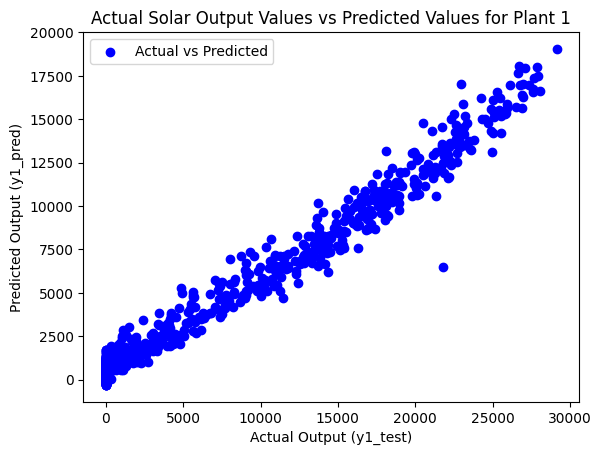

In [84]:
#Check the predicted vs actual values distribution
y1_pred = lr.predict(x1_test) #Change based on the model

plt.scatter(y1_test, y1_pred, label='Actual vs Predicted', color='blue', marker='o')  # Actual vs Predicted
plt.title('Actual Solar Output Values vs Predicted Values for Plant 1')
plt.xlabel('Actual Output (y1_test)')
plt.ylabel('Predicted Output (y1_pred)')
plt.legend()

plt.show()

* As we can see for Plant 1, the result have narrow/tight distribution which suggests accurate predictions.

### Plant 2

In [94]:
#Import metrics score that will be evalueated
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

#Function for model evaluation metrics score
def eval_regression(model):
  y2_pred = model.predict(x2_test)
  y2_pred_train = model.predict(x2_train)

  # print('MAE (train): ' + str(mean_absolute_error(y_test, y_pred_train)))
  print('MAE (test): ' + str(mean_absolute_error(y2_test, y2_pred)))

  # print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))
  print('RMSE (test): ' + str(mean_squared_error(y2_test, y2_pred, squared=False)))

  # print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train, y_pred_train)))
  print('MAPE (test): ' + str(mean_absolute_percentage_error(y2_test, y2_pred)))

  # print('R2 (train): ' + str(r2_score(y_train, y_pred_train)))
  print('R2 (test): ' + str(r2_score(y2_test, y2_pred)))

  #Cross Validation
  score = cross_validate(model, x2_train, y2_train, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True) #scoring change based on what metrics we want to validate (usually choose the main performance metric)
  print('RMSE Score (crossval train): '+ str((-1) * score['train_score'].mean()))
  print('RMSE Score (crossval test): '+ str((-1) * score['test_score'].mean()))

  score = cross_validate(model, x2_train, y2_train, cv=5, scoring='r2', return_train_score=True) #scoring change based on what metrics we want to validate (usually choose the main performance metric)
  print('R2 Score (crossval train): '+ str(score['train_score'].mean()))
  print('R2 Score (crossval test): '+ str(score['test_score'].mean()))


In [95]:
#Printing metrics score for all models to compare

#Linear Regression
print('\nEvaluate LinearRegression')
eval_regression(lr)

#Ridge Regressor
print('\nEvaluate RidgeRegression')
eval_regression(ridge)

#Lasso Regressor
print('\nEvaluate LassoRegression')
eval_regression(lasso)

#Elastic Net Regressor
print('\nEvaluate ElasticNetRegression')
eval_regression(elasticnet)

#Decision Tree Regressor
print('\nEvaluate DecisionTreeRegressor')
eval_regression(dt)

#Random Forest Regressor
print('\nEvaluate RandomForestRegressor')
eval_regression(rf)

#Support Vector Regressor
print('\nEvaluate SVR')
eval_regression(svr)

#AdaBoost Regressor
print('\nEvaluate AdaBoostRegressor')
eval_regression(ab)

#XGBoost Regressor
print('\nEvaluate XGBRegressor')
eval_regression(xg)


Evaluate LinearRegression
MAE (test): 1590.365024111128
RMSE (test): 2514.1338624843047
MAPE (test): 1.4549125337604498e+18
R2 (test): 0.8442875677809537
RMSE Score (crossval train): 2586.6900639720993
RMSE Score (crossval test): 2600.580549236237
R2 Score (crossval train): 0.8310198084517537
R2 Score (crossval test): 0.8285742245430864

Evaluate RidgeRegression
MAE (test): 1616.670600300366
RMSE (test): 2506.794504306157
MAPE (test): 1.5872974378574461e+18
R2 (test): 0.8451953644848588
RMSE Score (crossval train): 2599.481904498812
RMSE Score (crossval test): 2609.035202345026
R2 Score (crossval train): 0.8293410416191156
R2 Score (crossval test): 0.8272743190038581

Evaluate LassoRegression
MAE (test): 1595.5468520703546
RMSE (test): 2509.7546941741207
MAPE (test): 1.4860591086803471e+18
R2 (test): 0.8448295413753123
RMSE Score (crossval train): 2587.382218536631
RMSE Score (crossval test): 2601.1617588481813
R2 Score (crossval train): 0.8309293718110148
R2 Score (crossval test): 0.

RMSE Score (crossval train): 776.0438140329892
RMSE Score (crossval test): 2092.2254560200126
R2 Score (crossval train): 0.9848191950194138
R2 Score (crossval test): 0.8891188861251212

Evaluate SVR
MAE (test): 4627.762546115842
RMSE (test): 7205.885621267536
MAPE (test): 1.2275618031151987e+18
R2 (test): -0.27914925419205905
RMSE Score (crossval train): 7280.6545562763
RMSE Score (crossval test): 7281.142554511884
R2 Score (crossval train): -0.33869215181057816
R2 Score (crossval test): -0.3434309079385882

Evaluate AdaBoostRegressor
MAE (test): 1029.8442101251562
RMSE (test): 2036.6760409450696
MAPE (test): 2.0092274098286227e+17
R2 (test): 0.8978142345954874
RMSE Score (crossval train): 2126.617541019601
RMSE Score (crossval test): 2246.7528368154753
R2 Score (crossval train): 0.8911138489553766
R2 Score (crossval test): 0.877909491811599

Evaluate XGBRegressor
MAE (test): 899.6823216764009
RMSE (test): 2063.0420201810207
MAPE (test): 1.5895812207304787e+17
R2 (test): 0.895151398776

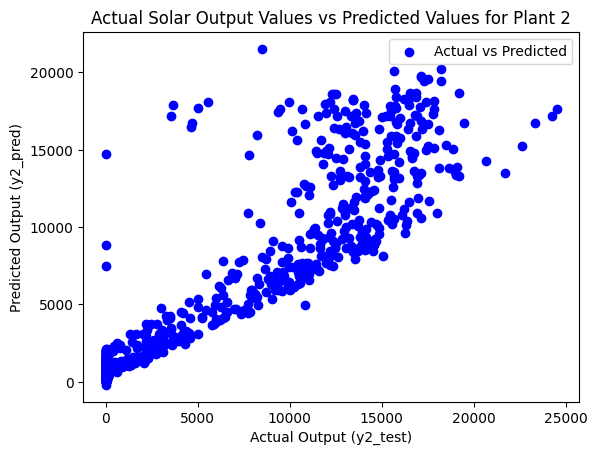

In [87]:
#Check the predicted vs actual values distribution
y2_pred = lr.predict(x2_test) #Change based on the model

plt.scatter(y2_test, y2_pred, label='Actual vs Predicted', color='blue', marker='o')  # Actual vs Predicted
plt.title('Actual Solar Output Values vs Predicted Values for Plant 2')
plt.xlabel('Actual Output (y2_test)')
plt.ylabel('Predicted Output (y2_pred)')
plt.legend()

plt.show()

* Observing Plant 2, the outcomes exhibit a somewhat dispersed distribution, particularly at higher values, signaling a less than optimal model.* Slightly scattered distribution indicates suboptimal model.
* This can be credited to the irregularities in output, possibly brought forth by faulty modules that we found in EDA process

# Conclusion

(will be added later)